In [362]:
import os
import numpy as np


In [828]:
os.getcwd()

'E:\\Upgrad\\CaseStudy\\LendingClub'

In [829]:
os.chdir(r'E:\Upgrad\repo\LendingClubCaseStudy')

In [830]:
os.getcwd()

'E:\\Upgrad\\repo\\LendingClubCaseStudy'

## Problem Statement - 
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
### Get and Explore the data.
To identify the risky loan we need to analyze only the data which is only related to Charged-off or fully paid

#### 1. Fetch the data in dataframe using read_csv()

In [403]:
import pandas as pd
loandataframe=pd.read_csv(r'loan\loan.csv')

#### 2.Check the basic table and its contents
#### 3.Browse the data

In [404]:
loandataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### 4. identify different columns in the data provided and total data

In [405]:
pd.options.display.max_rows = 4000
list(loandataframe.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [406]:
print(loandataframe.shape)
loandataframe.loan_status.value_counts()
# as our aim is to understand the data which is related to risky loan and mostly related to charged off or Fully paid, we can reduce the data set around Fully paid and Charged off
loandataframe=loandataframe[loandataframe.loan_status!="Current"]

(39717, 111)


In [407]:
loandataframe.shape # check the number of rows

(38577, 111)

#### 5. Identify the datatypes of columns, which will help in identifying any mismatch of data present, need to check those columns which have object and are these columns required specific treatment

In [408]:
loandataframe.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

    #### Finding the null values in the data only for 

In [409]:
loandataframe.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Data Cleaning
#### Finding out which columns needed to be taken in consideration, removing unnecassry columns id and member id have distinct values which means it will not have any specific data which will help in anaylsis

In [410]:
# checking for the duplicate columns 
print(loandataframe.id.duplicated().sum())
print(loandataframe.member_id.duplicated().sum())
print(loandataframe.duplicated().sum())
# no duplicate data found in the dataset

0
0
0


In [379]:
print("id value:",loandataframe.id.nunique())
print("member_id:",loandataframe.member_id.nunique()) # Unique value same as that of number of rows 

id value: 38577
member_id: 38577


* Fix rows and columns
* Fix missing values
* Standardise values
* Fix inavlid values
* Filter data

In [411]:
loandataframe.drop(['id','member_id'],inplace=True,axis=1) # data unique data, required for analysis

In [412]:
loandataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 109 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(74), int64(11), object(24)
memory usage: 32.4+ MB


In [413]:
loandataframe.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',

In [414]:
print(loandataframe.isnull().all(axis=1).sum())
print(loandataframe.isnull().all(axis=0).sum())

0
55


#### There are 0 empty rows and 55 empty columns, next step is to check which columns have all null or empty values

In [415]:
mostEmptyvalue=loandataframe.isnull().sum()

In [416]:
print(mostEmptyvalue[mostEmptyvalue==38577].count) #38577 is the max row size 
coltodrop=mostEmptyvalue[mostEmptyvalue==38577].index.tolist()

<bound method Series.count of next_pymnt_d                      38577
mths_since_last_major_derog       38577
annual_inc_joint                  38577
dti_joint                         38577
verification_status_joint         38577
tot_coll_amt                      38577
tot_cur_bal                       38577
open_acc_6m                       38577
open_il_6m                        38577
open_il_12m                       38577
open_il_24m                       38577
mths_since_rcnt_il                38577
total_bal_il                      38577
il_util                           38577
open_rv_12m                       38577
open_rv_24m                       38577
max_bal_bc                        38577
all_util                          38577
total_rev_hi_lim                  38577
inq_fi                            38577
total_cu_tl                       38577
inq_last_12m                      38577
acc_open_past_24mths              38577
avg_cur_bal                       38577
bc_open_to

In [417]:
loandataframe.drop(coltodrop,inplace=True,axis=1) # drop all the columns which have empty values 

In [418]:
loandataframe.shape # check if the drop happen

(38577, 54)

In [419]:
print(loandataframe.loan_amnt.describe())
print(loandataframe.int_rate.describe())

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object


In [420]:
print(loandataframe.pymnt_plan.value_counts()) # all values have n
print(loandataframe.initial_list_status.value_counts()) # all values as f
print(loandataframe.chargeoff_within_12_mths.value_counts()) # 39661 out of 39717 having 0.0 values
print(loandataframe.delinq_amnt.value_counts()) # all values having 0
print(loandataframe.tax_liens.value_counts()) # 39678 out of 39717 having 0.0 values

n    38577
Name: pymnt_plan, dtype: int64
f    38577
Name: initial_list_status, dtype: int64
0.0    38521
Name: chargeoff_within_12_mths, dtype: int64
0    38577
Name: delinq_amnt, dtype: int64
0.0    38538
Name: tax_liens, dtype: int64


In [421]:
print(loandataframe.mths_since_last_delinq.value_counts()) # having different values

0.0      443
15.0     244
23.0     243
30.0     243
24.0     236
38.0     233
19.0     232
22.0     228
20.0     226
18.0     225
35.0     223
32.0     221
31.0     220
25.0     219
39.0     218
37.0     216
45.0     215
26.0     210
21.0     208
10.0     208
16.0     207
17.0     206
27.0     206
42.0     204
29.0     204
36.0     202
47.0     202
43.0     194
40.0     192
41.0     192
12.0     191
34.0     191
46.0     190
44.0     190
48.0     189
6.0      188
14.0     188
28.0     184
33.0     181
7.0      172
9.0      171
8.0      165
13.0     165
11.0     159
49.0     149
4.0      147
58.0     147
5.0      145
3.0      143
53.0     142
59.0     141
52.0     134
56.0     129
50.0     129
73.0     127
55.0     127
63.0     126
60.0     123
72.0     122
68.0     122
57.0     120
71.0     119
70.0     117
54.0     114
74.0     113
62.0     111
67.0     108
75.0     108
76.0     107
61.0     107
51.0     106
69.0     105
79.0     101
2.0      101
66.0      97
64.0      94
80.0      91

#### Columns which needs to standardise and cleaned
1. int_rate,revol_util = % can be removed, so that mathemetical calculation can be done , in case required
2. emp_tile = empty values can be replaced with notunknow or can be removed alltogether
3. emp_length = a drived metrices can be created from the data with only number of years and also remove na data
4. issue_d =Convert data type in month and year
5. pymnt_plan can be removed as there is same data and not related 
6. Url is just and additional info and doesn't help in solving the issue and can be removed
7. Desc - lot of empty rows , however there seems to link with desc purpose and title , some time pupose varies from description
8. Zip_code - from zip code , we can identify which area have maxium loan, however area is much more specific
9. initial_list_status can also be removed as there are no data which help in analysis
10. chargeoff_within_12_mths, delinq_amt, tax_liens - no relevant data
11. mths_since_last_delinq, mths_since_last_record both having NA values which can be filled in by 0 as those who doesn't have defaults should have 0 associated with.
12. Add additional loanstatus numeric columns, 1 if its fullpaid 0 if its Charged off

In [422]:
# function to extract only digits
def fetchdigit(strng):
    tempdigit=''
    for i in strng:
        if i.isdigit():
            tempdigit=tempdigit+str(i)
    return int(tempdigit)


In [423]:
# function to remove outlier 
def findremout(dataseries):
    q1=dataseries.quantile(.25)
    q3=dataseries.quantile(.75)
    iqr=q3-q1
    upoutlierind=np.where(dataseries>=(q3+1.5*iqr))
    lwoutlierind=np.where(dataseries<=(q1-1.5*iqr))
    return [upoutlierind,lwoutlierind]

In [424]:
loandataframe['int_rate']=loandataframe['int_rate'].str.rstrip('%').apply(lambda x: float(x)) # Removing % from int_rate #1

In [425]:
loandataframe['revol_util']=loandataframe['revol_util'].str.rstrip('%').fillna(0).apply(lambda x: float(x)) # Removing % from revol_util #1

In [426]:
loandataframe['emp_title'].fillna('undisclosed',inplace=True) #2


In [427]:
loandataframe.emp_length.fillna('0',inplace=True) #3. Empty value is replaced with 0


In [428]:
loandataframe['emp_length']=loandataframe.emp_length.apply(fetchdigit) #3 Converting employee length to numbers 


In [429]:
loandataframe[['issue_m','issue_y']]=loandataframe['issue_d'].str.split('-',expand=True) # splitting into two columns month and year #4

In [430]:
additionalColumnToDrop=['pymnt_plan','url','initial_list_status','chargeoff_within_12_mths','delinq_amnt','tax_liens'] #5,#6 #8 #10
loandataframe.drop(additionalColumnToDrop,inplace=True,axis=1) # droping all columns which have less significance

In [431]:
loandataframe.mths_since_last_delinq.fillna(0,inplace=True)#11

In [732]:
loandataframe['loan_status_int']=loandataframe.loan_status.apply(lambda x : 1 if x=='Charged Off' else 0 )

In [432]:
loandataframe=loandataframe.round(2) # rounding of the number values to two digit

##### Most of the cleaning activities are done, before proceeding lets check the data

In [433]:
#print(loandataframe.info())
print(loandataframe.describe().round(2))
#print(loandataframe.value_counts())
print(loandataframe.shape)

       loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
count   38577.00     38577.00         38577.00  38577.00     38577.00   
mean    11047.03     10784.06         10222.48     11.93       322.47   
std      7348.44      7090.31          7022.72      3.69       208.64   
min       500.00       500.00             0.00      5.42        15.69   
25%      5300.00      5200.00          5000.00      8.94       165.74   
50%      9600.00      9550.00          8733.44     11.71       277.86   
75%     15000.00     15000.00         14000.00     14.38       425.55   
max     35000.00     35000.00         35000.00     24.40      1305.19   

       emp_length  annual_inc       dti  delinq_2yrs  inq_last_6mths  ...  \
count    38577.00    38577.00  38577.00     38577.00        38577.00  ...   
mean         4.93    68777.97     13.27         0.15            0.87  ...   
std          3.45    64218.68      6.67         0.49            1.07  ...   
min          0.00     4000.00     

    #### Checking all the columns for thier respective data type  and convert it numeric if required

In [434]:
loandataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   38577 non-null  object 
 9   emp_length                  38577 non-null  int64  
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  issue_d                     385

In [435]:
loandataframe.term

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: object

#### Univarate analysis
1. loan_amnt                   
2. funded_amnt
3. funded_amnt_inv
4. int_rate
5. installment
6. annual_inc
7. dti
8. delinq_2yrs
9. inq_last_6mths
10. mths_since_last_delinq
11. total_acc
12. out_prncp
13. out_prncp_inv 
14. total_pymnt
15. total_pymnt_inv
16. total_rec_prncp
17. total_rec_int
18. total_rec_late_fee
Statistical details using .describe()

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### loan_amt

In [437]:
loandataframe.loan_amnt.describe() # maximum loan amount requests as 35000 and most of the data belongs 5500 - 15000

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [524]:
loandataframe.loan_amnt.value_counts(bins=[0,500,5500,10000,15000,25000,35000])

(5500.0, 10000.0]     11772
(500.0, 5500.0]        9843
(10000.0, 15000.0]     6670
(15000.0, 25000.0]     3697
(25000.0, 35000.0]       32
(-0.001, 500.0]           5
Name: loan_amnt, dtype: int64


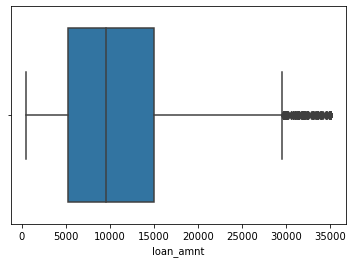

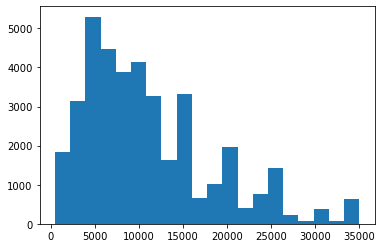

In [439]:
sns.boxplot(loandataframe.loan_amnt)
plt.show()
plt.hist(loandataframe.loan_amnt,bins=20)
plt.show() 

In [441]:
# based on box plot, upper extreme outliers are visible, which can be removed 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.loan_amnt)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

count    37488.000000
mean     10407.590429
std       6397.483985
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14956.250000
max      29500.000000
Name: loan_amnt, dtype: float64


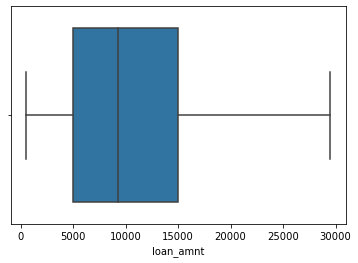

In [442]:
print(loandataframe.loan_amnt.describe())
sns.boxplot(loandataframe.loan_amnt)
plt.show() # outlier removed from the data

(5000.0, 10000.0]     11780
(1000.0, 5000.0]       8673
(10000.0, 15000.0]     6289
(15000.0, 20000.0]     2741
(20000.0, 25000.0]      698
(500.0, 1000.0]         289
(25000.0, 35000.0]       30
(-0.001, 500.0]           5
Name: loan_amnt, dtype: int64
Charged off :
 (5000.0, 10000.0]     1525
(1000.0, 5000.0]      1204
(10000.0, 15000.0]     888
(15000.0, 20000.0]     508
(20000.0, 25000.0]     171
(500.0, 1000.0]         46
(25000.0, 35000.0]      17
(-0.001, 500.0]          0
Name: loan_amnt, dtype: int64


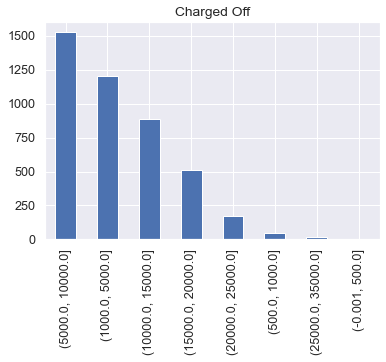

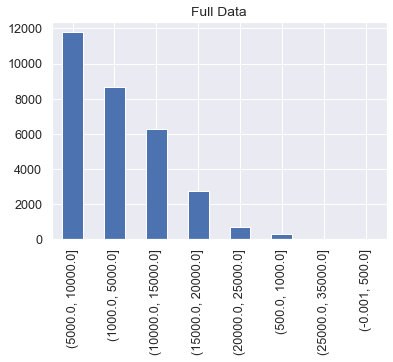

In [643]:
print(loandataframe.loan_amnt.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000])) 
# Most of the loan amount is for (500.0, 5500.0] | (500.0, 5500.0]
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].loan_amnt.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000]))
loandataframe[loandataframe.loan_status=='Charged Off'].loan_amnt.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000]).plot(kind='bar')
plt.title('Charged Off')
plt.show()
# Charged off loan also happens for loan amount which is mostly in demand 1000,5000 -10000  
loandataframe.loan_amnt.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000]).plot(kind='bar')
plt.title('Full Data')
plt.show()


##### funded_amnt_inv

count    37488.000000
mean      9634.040321
std       6134.260563
min          0.000000
25%       4989.377500
50%       8374.120000
75%      13400.000000
max      29300.000000
Name: funded_amnt_inv, dtype: float64


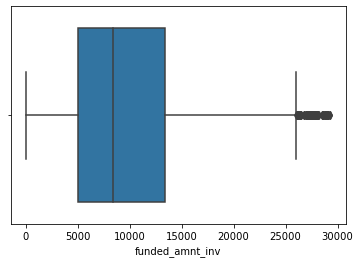

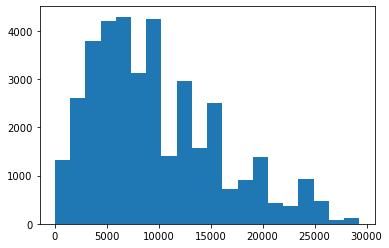

In [444]:
print(loandataframe.funded_amnt_inv.describe())
sns.boxplot(loandataframe.funded_amnt_inv)
plt.show()
plt.hist(loandataframe.funded_amnt_inv,bins=20)
plt.show() # Upper outliers are visible from box, the data cane be cleaned to further analysis and process

In [445]:
# Remove outlier value
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.funded_amnt_inv)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

count    37274.000000
mean      9530.107361
std       5995.818407
min          0.000000
25%       4975.000000
50%       8250.000000
75%      13140.345000
max      26000.000000
Name: funded_amnt_inv, dtype: float64


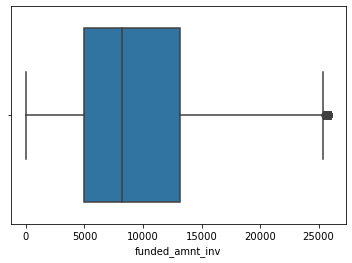

In [446]:
print(loandataframe.funded_amnt_inv.describe())
sns.boxplot(loandataframe.funded_amnt_inv)
plt.show()

(5000.0, 10000.0]     12217
(1000.0, 5000.0]       9591
(10000.0, 15000.0]     6442
(15000.0, 20000.0]     2494
(500.0, 1000.0]         534
(20000.0, 25000.0]      447
(-0.001, 500.0]         286
(25000.0, 35000.0]        8
Name: funded_amnt_inv, dtype: int64
Charged off :
 (5000.0, 10000.0]     1572
(1000.0, 5000.0]      1385
(10000.0, 15000.0]     904
(15000.0, 20000.0]     469
(20000.0, 25000.0]      99
(500.0, 1000.0]         74
(-0.001, 500.0]         67
(25000.0, 35000.0]       4
Name: funded_amnt_inv, dtype: int64


<AxesSubplot:>

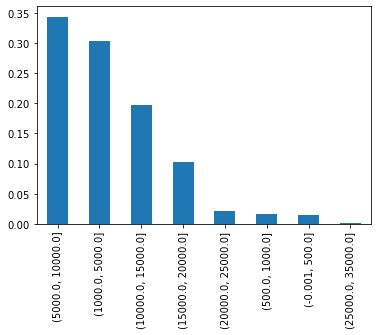

In [535]:
print(loandataframe.funded_amnt_inv.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000])) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].funded_amnt_inv.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000]))
loandataframe[loandataframe.loan_status=='Charged Off'].funded_amnt_inv.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000],normalize=True).plot(kind='bar')
# Charged off loan also happens for loan amount which is mostly in demand 1000,5000 -10000  

##### int_rate

count    37274.000000
mean        11.805742
std          3.608419
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64


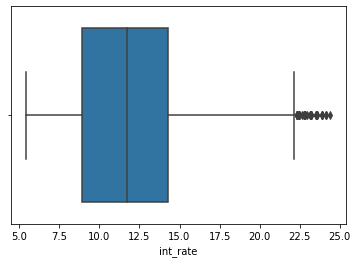

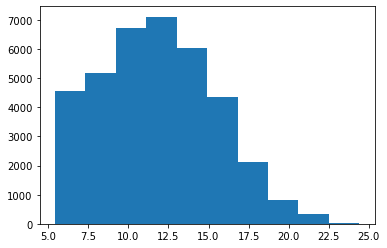

In [447]:
print(loandataframe.int_rate.describe())
sns.boxplot(loandataframe.int_rate)
plt.show()
plt.hist(loandataframe.int_rate,bins=10)
plt.show()

# Data shows that intrest rates are less than and equal to 14% for 75%, However the max interest is charged at 24% 

(4.0, 8.0]       7414
(10.0, 12.0]     6959
(14.0, 20.0]     6404
(12.0, 14.0]     5883
(8.0, 10.0]      3639
(20.0, 24.0]      205
(-0.001, 2.0]       0
(2.0, 4.0]          0
Name: int_rate, dtype: int64
Charged off :
 (14.0, 20.0]     1584
(12.0, 14.0]      969
(10.0, 12.0]      929
(4.0, 8.0]        406
(8.0, 10.0]       359
(20.0, 24.0]      111
(-0.001, 2.0]       0
(2.0, 4.0]          0
Name: int_rate, dtype: int64


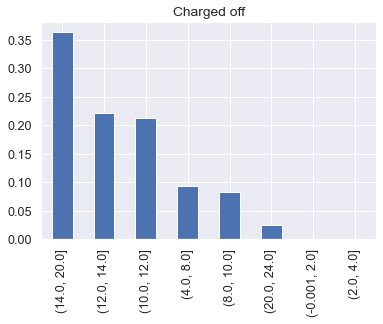

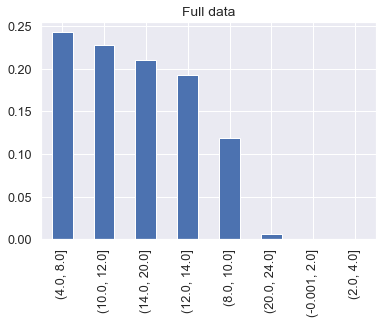

In [644]:
print(loandataframe.int_rate.value_counts(bins=[0,2,4,8,10,12,14,20,24])) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].int_rate.value_counts(bins=[0,2,4,8,10,12,14,20,24]))
loandataframe[loandataframe.loan_status=='Charged Off'].int_rate.value_counts(bins=[0,2,4,8,10,12,14,20,24],normalize=True).plot(kind='bar')
plt.title('Charged off')
plt.show()
# Charged off loan also happens for loan amount which is mostly in demand 1000,5000 -10000 
loandataframe.int_rate.value_counts(bins=[0,2,4,8,10,12,14,20,24],normalize=True).plot(kind='bar')
plt.title("Full data")
plt.show()


##### installment

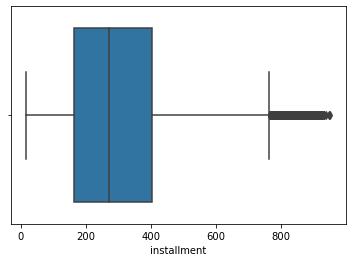

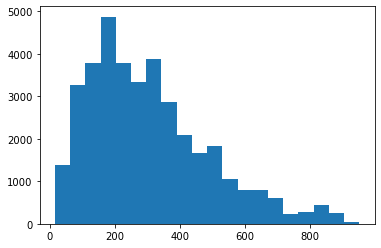

count    37274.000000
mean       304.144212
std        184.208416
min         15.690000
25%        163.110000
50%        269.485000
75%        402.800000
max        950.120000
Name: installment, dtype: float64

In [449]:
sns.boxplot(loandataframe.installment)
plt.show()
plt.hist(loandataframe.installment,bins=20)
plt.show()
loandataframe.installment.describe()

In [450]:
# installment data seems to have large number of outlier and that to at extreme end removing the outlier will help in analyzing the data in much better way
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.installment)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

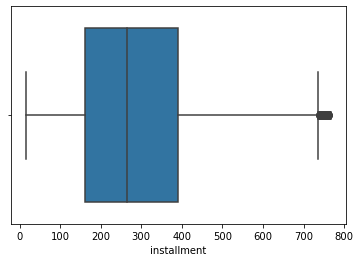

count    37258.000000
mean       290.795545
std        163.596423
min         15.690000
25%        162.190000
50%        264.660000
75%        391.547500
max        765.990000
Name: installment, dtype: float64


In [243]:
sns.boxplot(loandataframe.installment)
plt.show()
print(loandataframe.installment.describe())

(100.0, 200.0]    0.277367
(200.0, 300.0]    0.224211
(300.0, 400.0]    0.187701
(50.0, 100.0]     0.096661
(400.0, 500.0]    0.094506
(500.0, 600.0]    0.054999
(600.0, 700.0]    0.032387
(14.999, 50.0]    0.025766
(700.0, 800.0]    0.006402
Name: installment, dtype: float64
Charged off :
 (100.0, 200.0]    0.260603
(200.0, 300.0]    0.225623
(300.0, 400.0]    0.186489
(50.0, 100.0]     0.100568
(400.0, 500.0]    0.097289
(500.0, 600.0]    0.061653
(600.0, 700.0]    0.031482
(14.999, 50.0]    0.029515
(700.0, 800.0]    0.006777
Name: installment, dtype: float64


<AxesSubplot:>

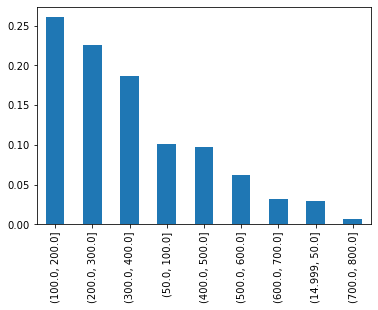

In [546]:
print(loandataframe.installment.value_counts(bins=[15,50,100,200,300,400,500,600,700,800],normalize=True))
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].installment.value_counts(bins=[15,50,100,200,300,400,500,600,700,800],normalize=True))
loandataframe[loandataframe.loan_status=='Charged Off'].installment.value_counts(bins=[15,50,100,200,300,400,500,600,700,800],normalize=True).plot(kind='bar')

##### fund_amnt

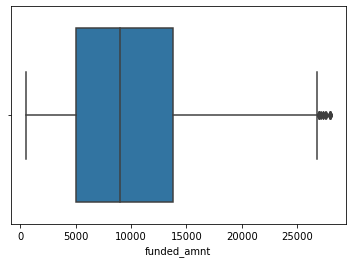

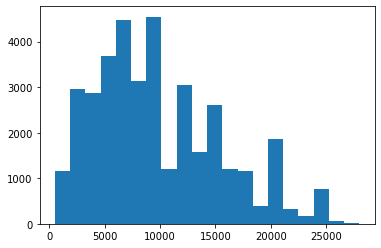

count    37258.000000
mean      9802.693381
std       5705.664788
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13775.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [244]:
sns.boxplot(loandataframe.funded_amnt)
plt.show()
plt.hist(loandataframe.funded_amnt,bins=20)
plt.show()
loandataframe.funded_amnt.describe() # few outliers seems to be present 

(5000.0, 10000.0]     12502
(1000.0, 5000.0]       9071
(10000.0, 15000.0]     6792
(15000.0, 20000.0]     2814
(20000.0, 25000.0]      519
(500.0, 1000.0]         303
(25000.0, 35000.0]       13
(-0.001, 500.0]           5
Name: funded_amnt, dtype: int64
Charged off :
 (5000.0, 10000.0]     1617
(1000.0, 5000.0]      1266
(10000.0, 15000.0]     968
(15000.0, 20000.0]     539
(20000.0, 25000.0]     127
(500.0, 1000.0]         48
(25000.0, 35000.0]       9
(-0.001, 500.0]          0
Name: funded_amnt, dtype: int64


<AxesSubplot:>

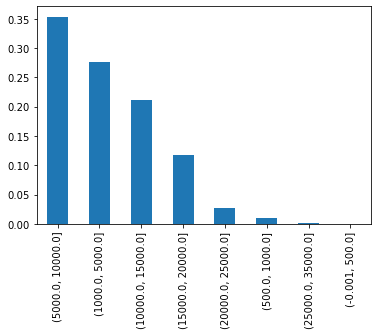

In [547]:
print(loandataframe.funded_amnt.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000],normalize=True)) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].funded_amnt.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000]))
loandataframe[loandataframe.loan_status=='Charged Off'].funded_amnt.value_counts(bins=[0,500,1000,5000,10000,15000,20000,25000,35000],normalize=True).plot(kind='bar')
# funded amount in range of 5000 -10000 have maximum Charge off 

##### annual_inc

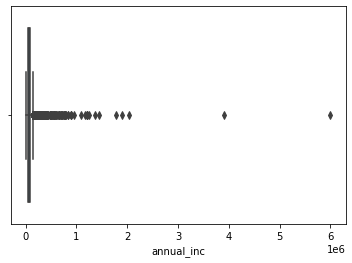

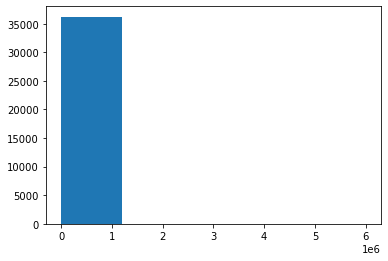

count    3.624000e+04
mean     6.554929e+04
std      6.208291e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.600000e+04
75%      7.900000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [451]:
sns.boxplot(loandataframe.annual_inc)
plt.show()
plt.hist(loandataframe.annual_inc,bins=5)
plt.show()
loandataframe.annual_inc.describe()

In [452]:
#removing outlier from the data 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.annual_inc)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

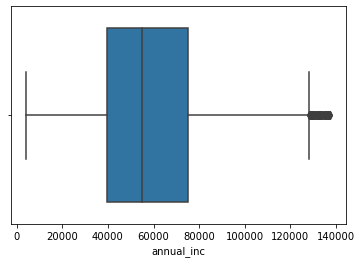

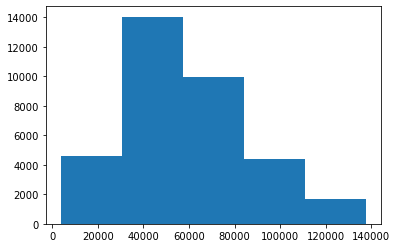

count     34660.000000
mean      58901.269284
std       26478.331891
min        4000.000000
25%       39600.000000
50%       54996.000000
75%       75000.000000
max      137496.000000
Name: annual_inc, dtype: float64

In [453]:
# Verify the data post removing outlier
sns.boxplot(loandataframe.annual_inc)
plt.show()
plt.hist(loandataframe.annual_inc,bins=5)
plt.show()
loandataframe.annual_inc.describe()

(40000.0, 50000.0]      0.164090
(50000.0, 60000.0]      0.154252
(30000.0, 40000.0]      0.154190
(60000.0, 70000.0]      0.109716
(20000.0, 30000.0]      0.103938
(70000.0, 80000.0]      0.090759
(80000.0, 90000.0]      0.062682
(100000.0, 120000.0]    0.053687
(90000.0, 100000.0]     0.048534
(10000.0, 20000.0]      0.033761
(120000.0, 140000.0]    0.021331
(3999.999, 10000.0]     0.003061
Name: annual_inc, dtype: float64
Charged off :
 (30000.0, 40000.0]      0.190643
(40000.0, 50000.0]      0.170529
(50000.0, 60000.0]      0.157193
(20000.0, 30000.0]      0.129646
(60000.0, 70000.0]      0.097945
(70000.0, 80000.0]      0.076082
(10000.0, 20000.0]      0.047442
(80000.0, 90000.0]      0.045693
(90000.0, 100000.0]     0.034324
(100000.0, 120000.0]    0.032575
(120000.0, 140000.0]    0.013555
(3999.999, 10000.0]     0.004373
Name: annual_inc, dtype: float64


<AxesSubplot:>

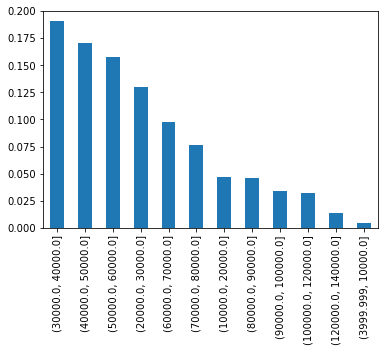

In [555]:
bin=[4000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000]
print(loandataframe.annual_inc.value_counts(bins=bin,normalize=True)) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].annual_inc.value_counts(bins=bin,normalize=True))
loandataframe[loandataframe.loan_status=='Charged Off'].annual_inc.value_counts(bins=bin,normalize=True).plot(kind='bar') 
# 30 k to 60K have maximum chargoff

##### dti

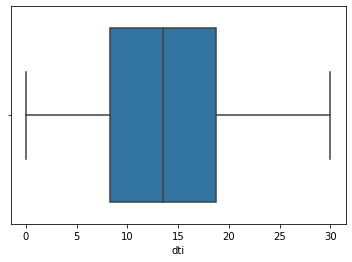

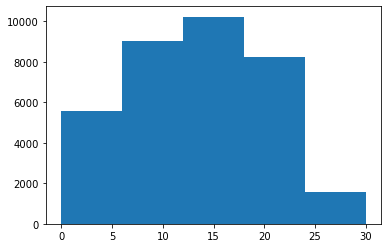

count    34660.000000
mean        13.417094
std          6.671527
min          0.000000
25%          8.297500
50%         13.520000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [454]:
sns.boxplot(loandataframe.dti)
plt.show()
plt.hist(loandataframe.dti,bins=5)
plt.show()
loandataframe.dti.describe() #Data seems to be well distributed 

(12.0, 14.0]     0.101533
(14.0, 16.0]     0.099909
(10.0, 12.0]     0.097411
(16.0, 18.0]     0.090571
(8.0, 10.0]      0.089166
(18.0, 20.0]     0.086699
(6.0, 8.0]       0.078641
(20.0, 22.0]     0.076111
(22.0, 24.0]     0.067897
(4.0, 6.0]       0.067210
(2.0, 4.0]       0.052594
(-0.001, 2.0]    0.048315
(24.0, 26.0]     0.032012
(26.0, 28.0]     0.007058
(28.0, 30.0]     0.004872
Name: dti, dtype: float64
Charged off :
 (12.0, 14.0]     0.105597
(14.0, 16.0]     0.100350
(16.0, 18.0]     0.099038
(18.0, 20.0]     0.097508
(20.0, 22.0]     0.091823
(10.0, 12.0]     0.088325
(8.0, 10.0]      0.080892
(22.0, 24.0]     0.080236
(6.0, 8.0]       0.066681
(4.0, 6.0]       0.053345
(2.0, 4.0]       0.044819
(-0.001, 2.0]    0.044163
(24.0, 26.0]     0.037167
(26.0, 28.0]     0.005903
(28.0, 30.0]     0.004154
Name: dti, dtype: float64


<AxesSubplot:>

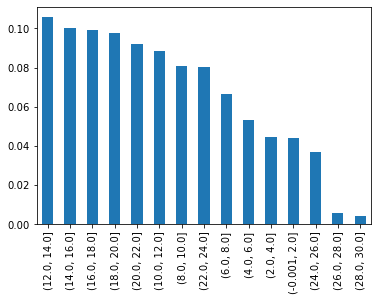

In [558]:
bin=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
print(loandataframe.dti.value_counts(bins=bin,normalize=True)) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].dti.value_counts(bins=bin,normalize=True))
loandataframe[loandataframe.loan_status=='Charged Off'].dti.value_counts(bins=bin,normalize=True).plot(kind='bar')

##### delinq_2yrs

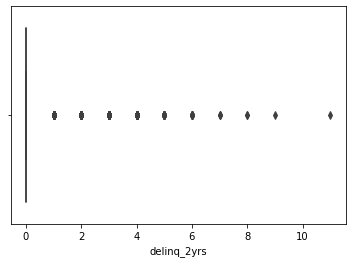

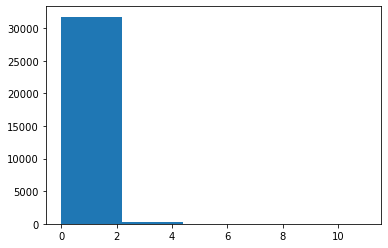

count    32019.000000
mean         0.144820
std          0.491462
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64
0    4022
1     412
2      94
3      30
4      11
5       2
7       1
6       1
8       1
Name: delinq_2yrs, dtype: int64


In [563]:
sns.boxplot(loandataframe.delinq_2yrs)
plt.show()
plt.hist(loandataframe.delinq_2yrs,bins=5)
plt.show()
print(loandataframe.delinq_2yrs.describe())
print(loandataframe[loandataframe.loan_status=='Charged Off'].delinq_2yrs.value_counts())

In [456]:
loandataframe.delinq_2yrs.value_counts() # most of the value is in 0-1 range, also the outlier value is pretty small

0     30911
1      2874
2       591
3       192
4        56
5        18
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [457]:
tempdataFrame=pd.DataFrame(loandataframe) #saving for future refrecne


##### inq_last_6mths


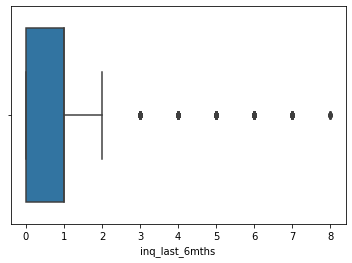

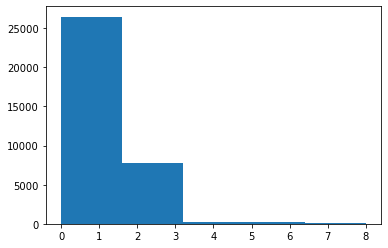

count    34660.000000
mean         0.863185
std          1.059842
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [458]:
sns.boxplot(loandataframe.inq_last_6mths)
plt.show()
plt.hist(loandataframe.inq_last_6mths,bins=5)
plt.show()
loandataframe.inq_last_6mths.describe()

In [565]:
print(loandataframe.inq_last_6mths.value_counts())
print(loandataframe[loandataframe.loan_status=='Charged Off'].inq_last_6mths.value_counts())
# based on this data Most of the person doesn't go for delienque

0    15659
1     8849
2     4632
3     2450
4      242
5      113
6       39
7       28
8        7
Name: inq_last_6mths, dtype: int64
0    1849
1    1347
2     775
3     522
4      40
5      19
6      11
7       9
8       2
Name: inq_last_6mths, dtype: int64


#### mths_since_last_delinq

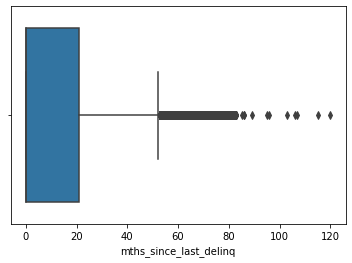

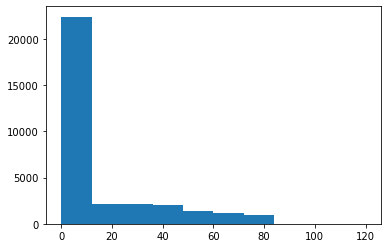

In [571]:
sns.boxplot(loandataframe.mths_since_last_delinq)
plt.show()
plt.hist(loandataframe.mths_since_last_delinq,bins=10)
plt.show()


In [568]:
print(loandataframe.mths_since_last_delinq.value_counts(bins=[0,5,10,20,30,40,50,60,80,90,100,110]))
print(loandataframe[loandataframe.loan_status=='Charged Off'].mths_since_last_delinq.value_counts(bins=[0,5,10,20,30,40,50,60,80,90,100,110]))

(-0.001, 5.0]     21532
(20.0, 30.0]       1800
(60.0, 80.0]       1794
(30.0, 40.0]       1735
(10.0, 20.0]       1685
(40.0, 50.0]       1545
(50.0, 60.0]       1066
(5.0, 10.0]         729
(80.0, 90.0]        126
(100.0, 110.0]        3
(90.0, 100.0]         2
Name: mths_since_last_delinq, dtype: int64
(-0.001, 5.0]     2952
(60.0, 80.0]       296
(10.0, 20.0]       274
(20.0, 30.0]       264
(40.0, 50.0]       241
(30.0, 40.0]       228
(50.0, 60.0]       164
(5.0, 10.0]        130
(80.0, 90.0]        24
(100.0, 110.0]       1
(90.0, 100.0]        0
Name: mths_since_last_delinq, dtype: int64


##### total_acc

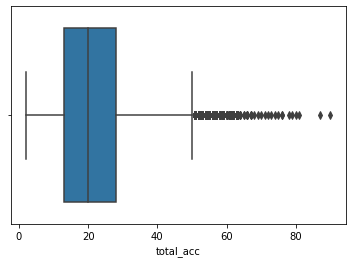

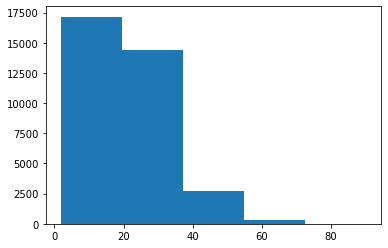

count    34660.000000
mean        21.311137
std         11.147186
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [461]:
sns.boxplot(loandataframe.total_acc)
plt.show()
plt.hist(loandataframe.total_acc,bins=5)
plt.show()
loandataframe.total_acc.describe()

In [574]:
# removing outlier from data
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.total_acc)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)


(10.0, 15.0]     0.191766
(15.0, 20.0]     0.188116
(20.0, 25.0]     0.162409
(5.0, 10.0]      0.139711
(25.0, 30.0]     0.119253
(30.0, 35.0]     0.078115
(35.0, 40.0]     0.050134
(-0.001, 5.0]    0.035024
(40.0, 45.0]     0.027212
(45.0, 50.0]     0.008260
(50.0, 55.0]     0.000000
(55.0, 60.0]     0.000000
(60.0, 65.0]     0.000000
(65.0, 70.0]     0.000000
(70.0, 75.0]     0.000000
(75.0, 80.0]     0.000000
(80.0, 85.0]     0.000000
(85.0, 90.0]     0.000000
(90.0, 95.0]     0.000000
Name: total_acc, dtype: float64
Charged off :
 (10.0, 15.0]     0.196524
(15.0, 20.0]     0.183378
(5.0, 10.0]      0.157086
(20.0, 25.0]     0.148173
(25.0, 30.0]     0.111631
(30.0, 35.0]     0.070187
(35.0, 40.0]     0.051471
(-0.001, 5.0]    0.045677
(40.0, 45.0]     0.029189
(45.0, 50.0]     0.006684
(50.0, 55.0]     0.000000
(55.0, 60.0]     0.000000
(60.0, 65.0]     0.000000
(65.0, 70.0]     0.000000
(70.0, 75.0]     0.000000
(75.0, 80.0]     0.000000
(80.0, 85.0]     0.000000
(85.0, 90.0]     

<AxesSubplot:>

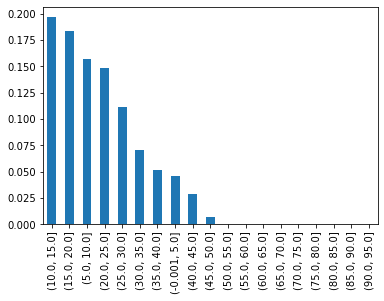

In [575]:
bin=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
print(loandataframe.total_acc.value_counts(bins=bin,normalize=True)) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].total_acc.value_counts(bins=bin,normalize=True))
loandataframe[loandataframe.loan_status=='Charged Off'].total_acc.value_counts(bins=bin,normalize=True).plot(kind='bar')

### open_acc

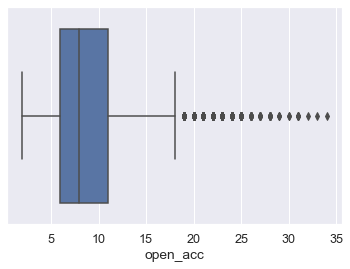

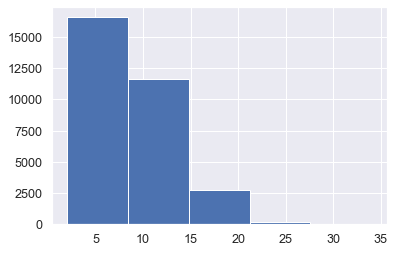

count    31236.000000
mean         8.823217
std          4.083567
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         34.000000
Name: open_acc, dtype: float64

In [612]:
sns.boxplot(loandataframe.open_acc)
plt.show()
plt.hist(loandataframe.open_acc,bins=5)
plt.show()
loandataframe.open_acc.describe()

In [614]:
# removing outlier from data
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.open_acc)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

(5.0, 10.0]      0.502344
(10.0, 15.0]     0.230880
(-0.001, 5.0]    0.219603
(15.0, 20.0]     0.047173
(20.0, 25.0]     0.000000
(25.0, 30.0]     0.000000
(30.0, 35.0]     0.000000
Name: open_acc, dtype: float64
Charged off :
 (5.0, 10.0]      0.492315
(-0.001, 5.0]    0.239963
(10.0, 15.0]     0.225052
(15.0, 20.0]     0.042670
(20.0, 25.0]     0.000000
(25.0, 30.0]     0.000000
(30.0, 35.0]     0.000000
Name: open_acc, dtype: float64


<AxesSubplot:>

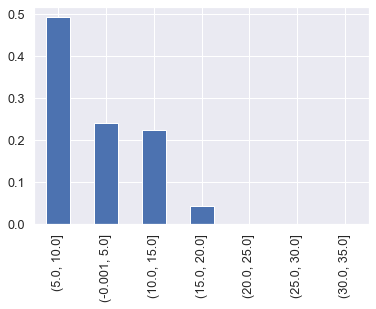

In [615]:
bin=[0,5,10,15,20,25,30,35]
print(loandataframe.open_acc.value_counts(bins=bin,normalize=True)) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].open_acc.value_counts(bins=bin,normalize=True))
loandataframe[loandataframe.loan_status=='Charged Off'].open_acc.value_counts(bins=bin,normalize=True).plot(kind='bar')

##### out_prncp

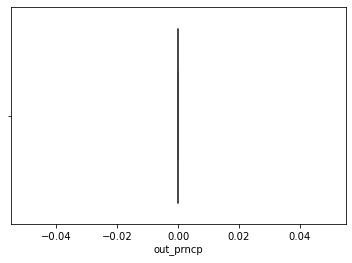

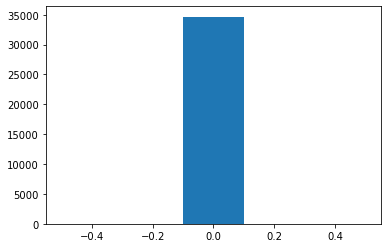

count    34660.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64

In [462]:
sns.boxplot(loandataframe.out_prncp)
plt.show()
plt.hist(loandataframe.out_prncp,bins=5)
plt.show()
loandataframe.out_prncp.describe() #data doesn't seems to be releavnt for processing

##### out_prncp_inv

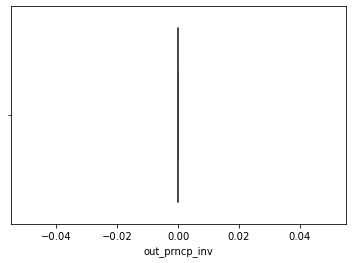

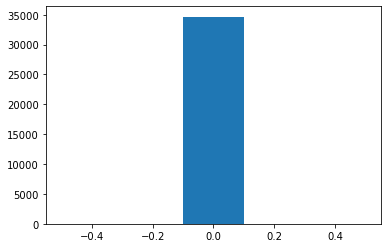

count    34660.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64

In [463]:
sns.boxplot(loandataframe.out_prncp_inv)
plt.show()
plt.hist(loandataframe.out_prncp_inv,bins=5)
plt.show()
loandataframe.out_prncp_inv.describe() #data doesn't seems to be releavnt for processing

##### total_pymnt

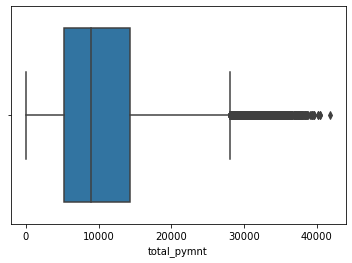

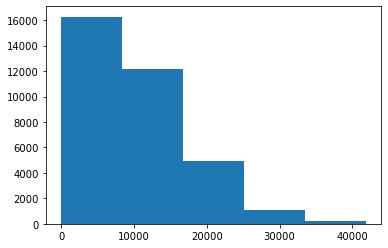

count    34660.000000
mean     10419.956786
std       6949.602431
min          0.000000
25%       5226.082500
50%       8911.845000
75%      14337.595000
max      41829.770000
Name: total_pymnt, dtype: float64

In [464]:
sns.boxplot(loandataframe.total_pymnt)
plt.show()
plt.hist(loandataframe.total_pymnt,bins=5)
plt.show()
loandataframe.total_pymnt.describe()

In [465]:
#removing outlier from the data 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.total_pymnt)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

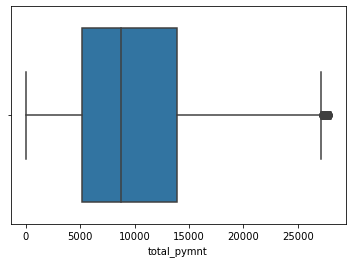

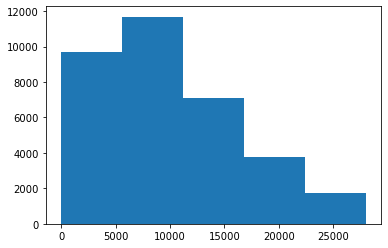

count    33974.000000
mean      9983.928480
std       6283.749174
min          0.000000
25%       5136.595000
50%       8738.545000
75%      13942.555000
max      27996.360000
Name: total_pymnt, dtype: float64

In [466]:
sns.boxplot(loandataframe.total_pymnt)
plt.show()
plt.hist(loandataframe.total_pymnt,bins=5)
plt.show()
loandataframe.total_pymnt.describe()

(5587.918, 8381.877]               0.208253
(2793.959, 5587.918]               0.191926
(8381.877, 11175.836]              0.155045
(11175.836, 13969.795]             0.127353
(-27.941000000000003, 2793.959]    0.111602
(13969.795, 16763.754]             0.084038
(16763.754, 19557.713]             0.062556
(19557.713, 22351.672]             0.030670
(22351.672, 25145.631]             0.022890
(25145.631, 27939.59]              0.005667
Name: total_pymnt, dtype: float64
Charged off :
 (-24.398, 2439.679]       0.329100
(2439.679, 4879.358]      0.269385
(4879.358, 7319.037]      0.186275
(7319.037, 9758.716]      0.108289
(9758.716, 12198.395]     0.054367
(12198.395, 14638.074]    0.031417
(14638.074, 17077.753]    0.013369
(17077.753, 19517.432]    0.004456
(19517.432, 21957.111]    0.002228
(21957.111, 24396.79]     0.001114
Name: total_pymnt, dtype: float64


<AxesSubplot:>

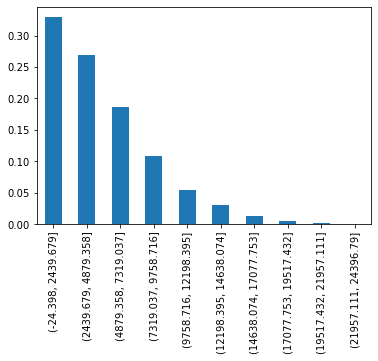

In [577]:
bin=10
print(loandataframe.total_pymnt.value_counts(bins=bin,normalize=True)) 
print("Charged off :\n",loandataframe[loandataframe.loan_status=='Charged Off'].total_pymnt.value_counts(bins=bin,normalize=True))
loandataframe[loandataframe.loan_status=='Charged Off'].total_pymnt.value_counts(bins=bin,normalize=True).plot(kind='bar')

##### total_pymnt_inv

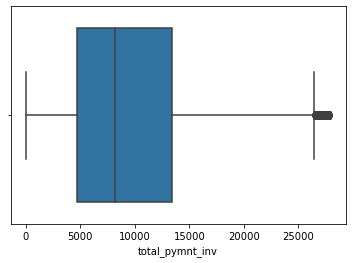

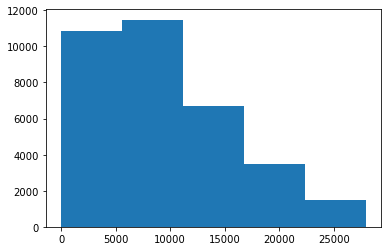

count    33974.000000
mean      9472.839655
std       6235.109575
min          0.000000
25%       4654.730000
50%       8201.715000
75%      13373.455000
max      27922.130000
Name: total_pymnt_inv, dtype: float64

In [467]:
sns.boxplot(loandataframe.total_pymnt_inv)
plt.show()
plt.hist(loandataframe.total_pymnt_inv,bins=5)
plt.show()
loandataframe.total_pymnt_inv.describe()

##### total_rec_prncp

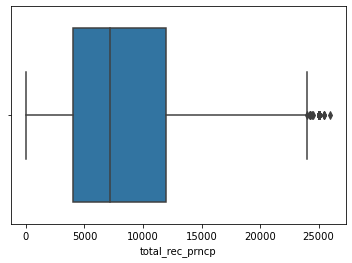

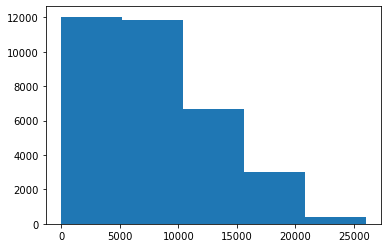

count    33974.000000
mean      8240.778498
std       5240.031209
min          0.000000
25%       4000.000000
50%       7200.000000
75%      12000.000000
max      26000.000000
Name: total_rec_prncp, dtype: float64

In [468]:
sns.boxplot(loandataframe.total_rec_prncp)
plt.show()
plt.hist(loandataframe.total_rec_prncp,bins=5)
plt.show()
loandataframe.total_rec_prncp.describe()

##### total_rec_int

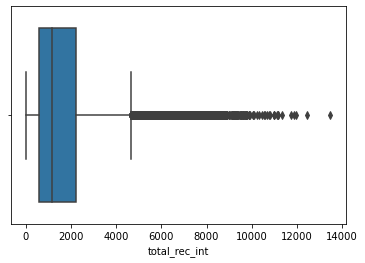

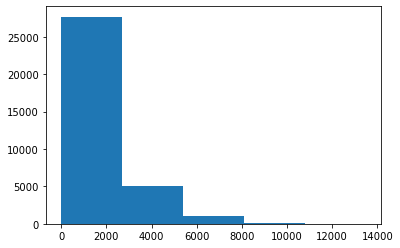

count    33974.000000
mean      1662.169902
std       1558.063885
min          0.000000
25%        591.445000
50%       1161.425000
75%       2217.652500
max      13482.630000
Name: total_rec_int, dtype: float64

In [469]:
sns.boxplot(loandataframe.total_rec_int)
plt.show()
plt.hist(loandataframe.total_rec_int,bins=5)
plt.show()
loandataframe.total_rec_int.describe()

In [470]:
#removing outlier from the data 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.total_rec_int)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

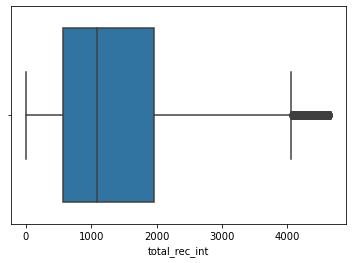

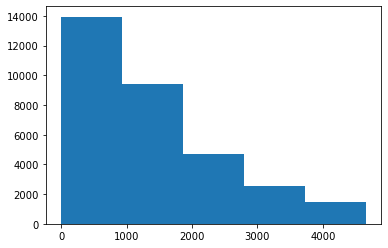

count    32019.000000
mean      1385.836426
std       1068.773400
min          0.000000
25%        562.500000
50%       1083.170000
75%       1961.140000
max       4655.170000
Name: total_rec_int, dtype: float64

In [471]:
sns.boxplot(loandataframe.total_rec_int)
plt.show()
plt.hist(loandataframe.total_rec_int,bins=5)
plt.show()
loandataframe.total_rec_int.describe()

##### total_rec_late_fee

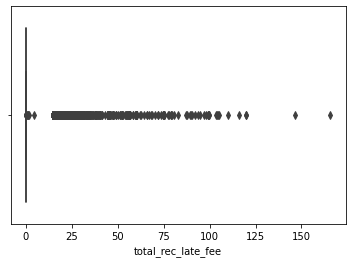

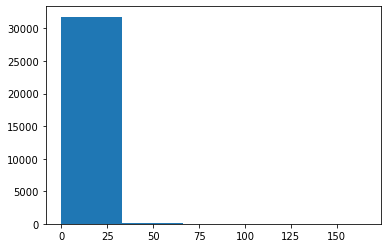

count    32019.000000
mean         1.195088
std          6.327043
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        165.690000
Name: total_rec_late_fee, dtype: float64

In [472]:
sns.boxplot(loandataframe.total_rec_late_fee)
plt.show()
plt.hist(loandataframe.total_rec_late_fee,bins=5)
plt.show()
loandataframe.total_rec_late_fee.describe() # mostly value is zero and can be used for further analysis

##### Analyzing catogorical data
1. Term

In [485]:
fpdf=loandataframe[loandataframe.loan_status=='Fully Paid']
codf=loandataframe[loandataframe.loan_status=='Charged Off']

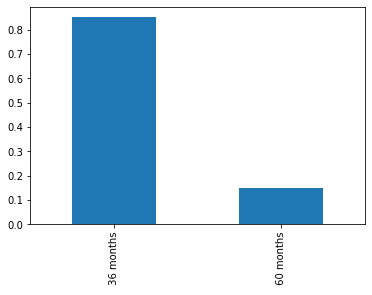

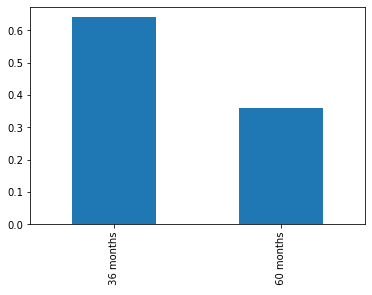

<function matplotlib.pyplot.show(close=None, block=None)>

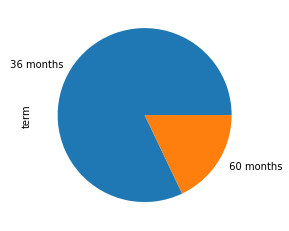

In [490]:
#plt.bar(fpdf.term.value_counts(normalize=True))
fpdf.term.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.term.value_counts(normalize=True).plot(kind='bar')
plt.show()
loandataframe.term.value_counts(normalize=True).plot(kind='pie')
plt.show
# 80% of the loan have 36 months term. However there is a strange pattern , With charge-off mostly people try to get loan term more compared to fully paid

2. Grade

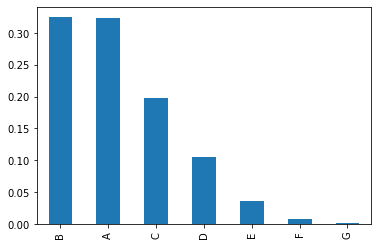

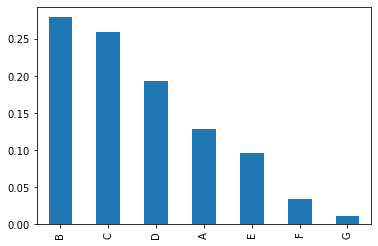

<function matplotlib.pyplot.show(close=None, block=None)>

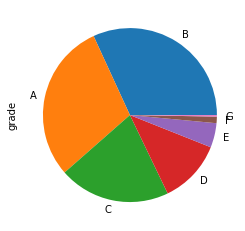

In [492]:
fpdf.grade.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.grade.value_counts(normalize=True).plot(kind='bar')
plt.show()
loandataframe.grade.value_counts(normalize=True).plot(kind='pie')
plt.show
# 70% of charged-off loan which belongs to B,C,D grade and suggested that grade category D might be a risky 

3. emp_title

In [495]:
print('Fully paid \n',fpdf.emp_title.value_counts()) # Distint employee title 
print("Charged Off \n",codf.emp_title.value_counts()) # no inference can be made , this column can be deleted

Fully paid 
 undisclosed                              1574
US Army                                    87
Bank of America                            70
US Air Force                               43
IBM                                        38
                                         ... 
Wyndham Vacation Ownership                  1
Bags and Cars, A Plus Service Company       1
Harrison Police Dept                        1
USDA-NRCS                                   1
Evergreen Center                            1
Name: emp_title, Length: 20652, dtype: int64
Charged Off 
 undisclosed                                                  408
Bank of America                                               19
US Army                                                       13
Walmart                                                       13
AT&T                                                           9
UPS                                                            8
Kaiser Permanente               

In [578]:
len(set(loandataframe.emp_title))# unique 24319 emp title grouping them to a single employment would be difficult and doesn't provide a good insight

23307

4. emp_length

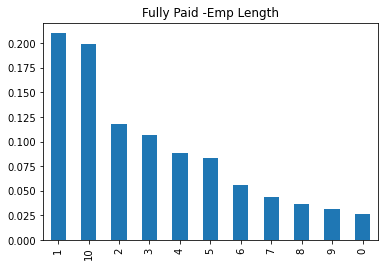

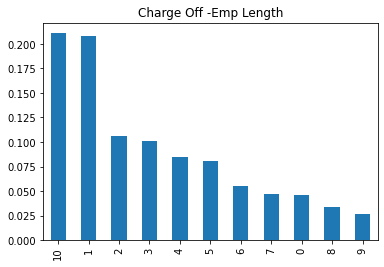

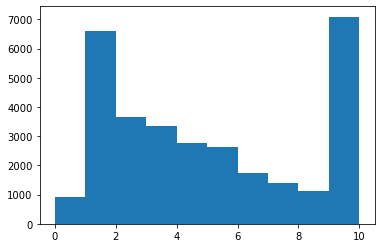

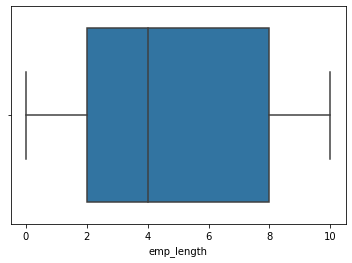

In [579]:
fpdf.emp_length.value_counts(normalize=True).plot(kind='bar')
plt.title('Fully Paid -Emp Length')
plt.show()
plt.title('Charge Off -Emp Length')
codf.emp_length.value_counts(normalize=True).plot(kind='bar')
plt.show()
plt.hist(loandataframe.emp_length,bins=10)
plt.show()
sns.boxplot(loandataframe.emp_length)
plt.show()
# nothing can be infered from here as employee length  doesn't seems to have any impact 

5. Home ownership

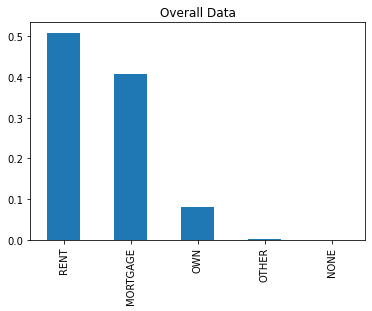

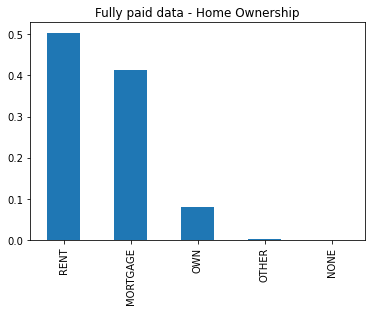

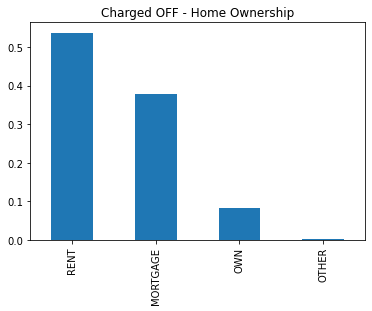

In [501]:
loandataframe.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.title('Overall Data')
plt.show()
fpdf.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.title('Fully paid data - Home Ownership')
plt.show()
plt.title ('Charged OFF - Home Ownership')
codf.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.show()
# Home Ownership as Rent have maximum number of loan and as well Charge off

6. issue_d,
issue_m (Derived metrices),
issue_y (Derived metrices)

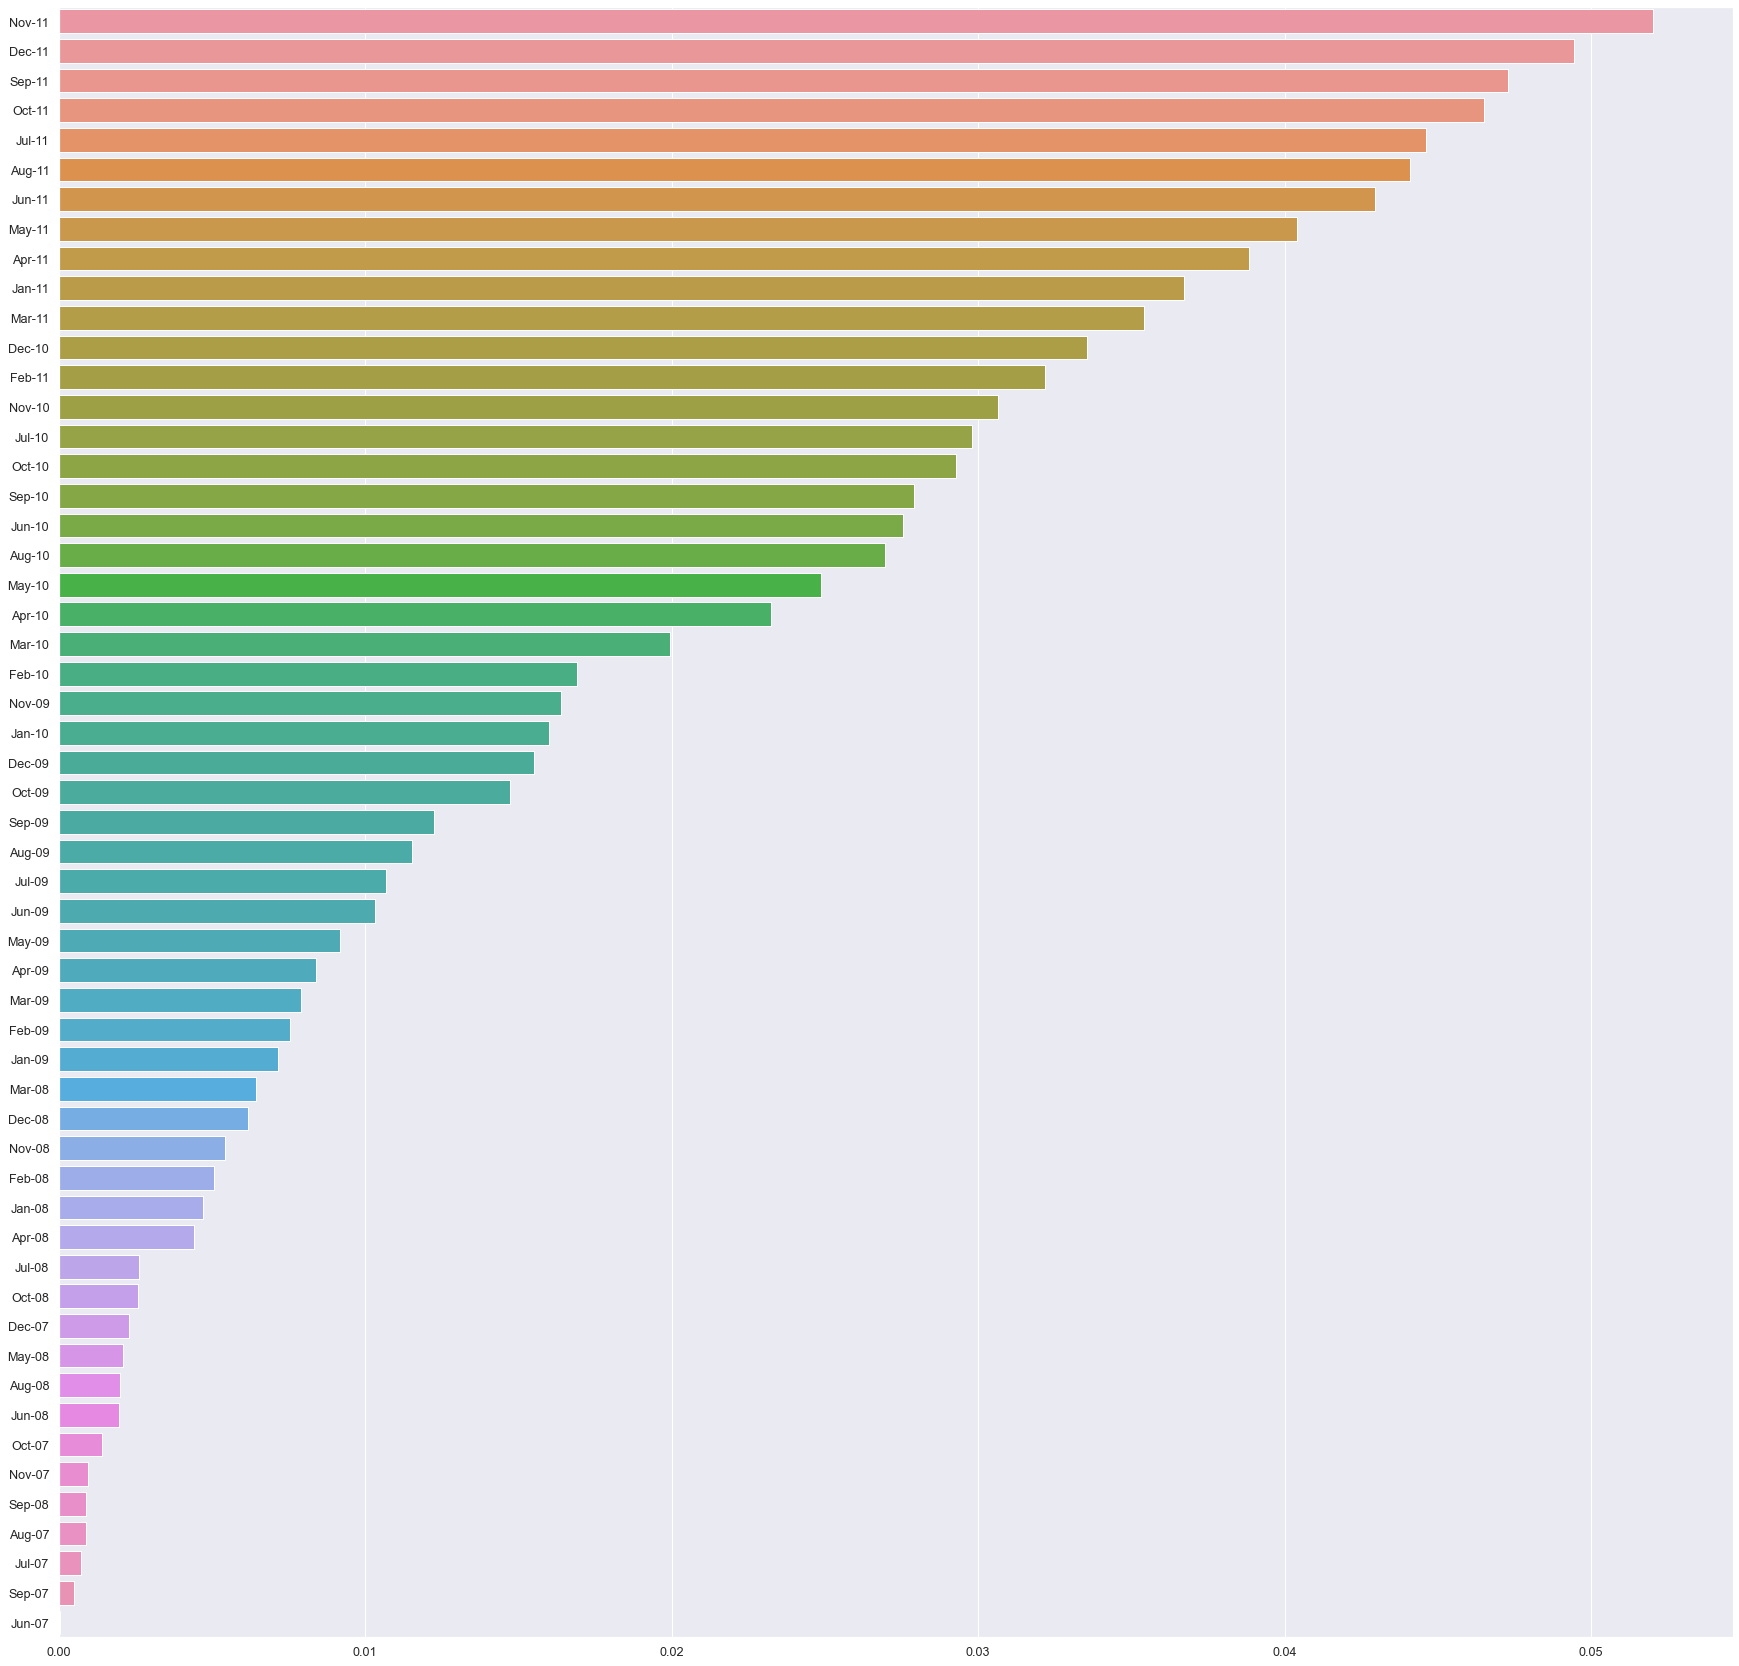

In [646]:
issuedate=loandataframe.issue_d.value_counts(normalize=True)
#fig,ax=plt.subplots(figsize=(13,7))
plt.figure(figsize=(30,30))
sns.barplot(x=issuedate.values,y=issuedate.keys())
plt.show()

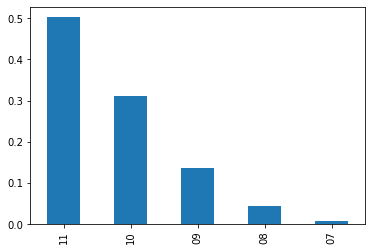

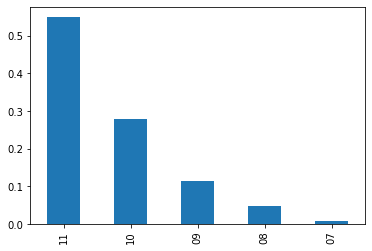

In [510]:
fpdf.issue_y.value_counts(normalize=True).plot(kind='bar')

plt.show()
codf.issue_y.value_counts(normalize=True).plot(kind='bar')
plt.show()
# 50% of loan was issued in the 2011 follwed by 30% in 2010.
# over the year banks has increases the loan from 07 to 2011( exposure is higher in 2011)
# charged of loan happens mostly in 2011

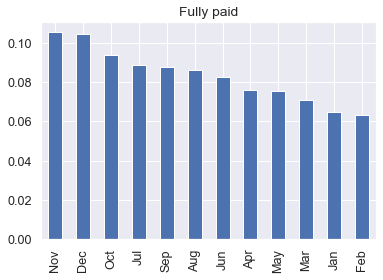

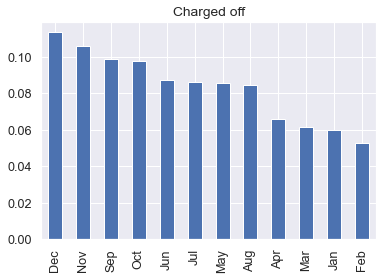

In [647]:
fpdf.issue_m.value_counts(normalize=True).plot(kind='bar')
plt.title("Fully paid")
plt.show()
codf.issue_m.value_counts(normalize=True).plot(kind='bar')
plt.title("Charged off")
plt.show()
# irrespective of Year, it seems the loan which is issued at end of year have dec have most charged-off and risky

#irrespective of year loan is distributes across each an every month with more or less same value, However most of the defaults happen for the loan provided for the month of december 

loan_status

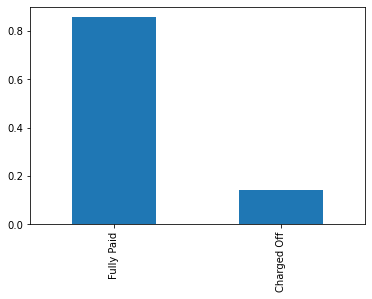

Fully Paid     0.857147
Charged Off    0.142853
Name: loan_status, dtype: float64

In [505]:
loandataframe.loan_status.value_counts(normalize=True).plot(kind='bar')
plt.show()
#84% of people have paid there loan, while 14% are charged off
loandataframe.loan_status.value_counts(normalize=True)

7. Purpose

debt_consolidation    0.453231
credit_card           0.131360
other                 0.108967
home_improvement      0.069271
major_purchase        0.059933
car                   0.044036
small_business        0.040195
wedding               0.025641
medical               0.018708
moving                0.016428
vacation              0.011118
educational           0.009526
house                 0.008901
renewable_energy      0.002686
Name: purpose, dtype: float64


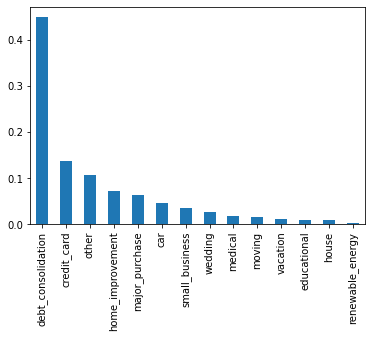

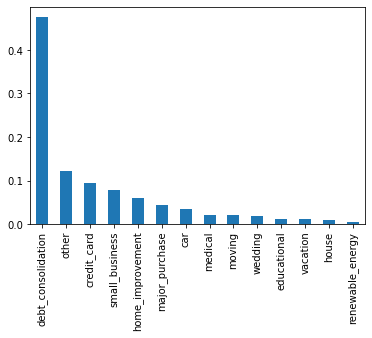

In [508]:
print(loandataframe.purpose.value_counts(normalize=True))
fpdf.purpose.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.purpose.value_counts(normalize=True).plot(kind='bar')
plt.show()


#45% of loans are taken to pay off multiple debts, which means debt_consolidation, crditcard payment and others are main contributer and also leads to chargeoff 

8. addr_state

CA    0.201137
FL    0.092479
NY    0.085702
TX    0.051596
NJ    0.047442
GA    0.039353
IL    0.034980
PA    0.031264
VA    0.029077
OH    0.028640
MA    0.028203
MD    0.027547
AZ    0.022956
MO    0.022737
WA    0.021425
NC    0.020988
MI    0.018146
CT    0.018146
NV    0.018146
CO    0.017490
MN    0.015741
OR    0.013555
SC    0.011587
WI    0.010713
LA    0.010057
AL    0.009182
KY    0.008526
OK    0.007652
UT    0.005903
NM    0.005684
KS    0.005684
HI    0.005466
AR    0.004810
RI    0.004810
NH    0.004591
WV    0.004154
DC    0.002405
DE    0.002405
SD    0.002186
AK    0.001968
MT    0.001968
VT    0.001093
WY    0.000656
NE    0.000656
MS    0.000437
TN    0.000437
ID    0.000219
Name: addr_state, dtype: float64


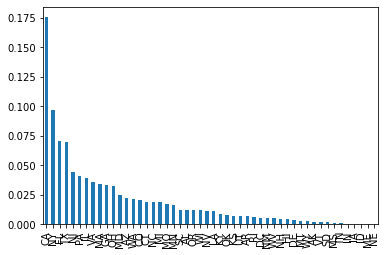

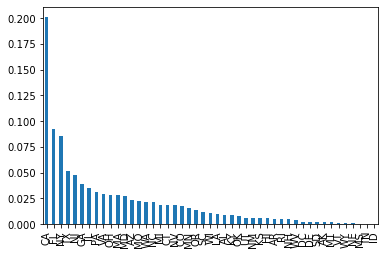

In [515]:
print(codf.addr_state.value_counts(normalize=True))
fpdf.addr_state.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.addr_state.value_counts(normalize=True).plot(kind='bar')
plt.show()
# Calafornia state have maximum 17% of loan accounts and also 20% default as well.

verification_status

<AxesSubplot:>

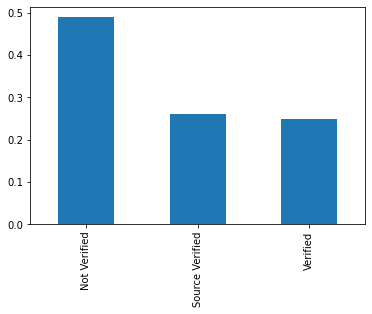

In [583]:
loandataframe.verification_status.value_counts(normalize=True).plot(kind='bar')

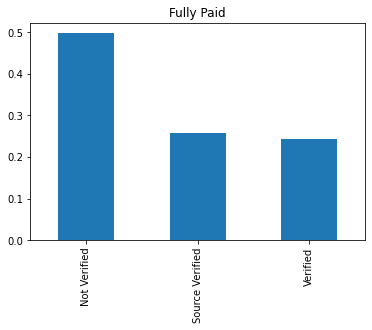

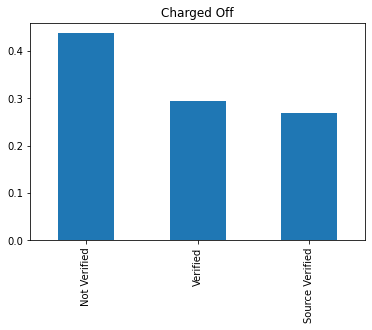

In [584]:
fpdf.verification_status.value_counts(normalize=True).plot(kind='bar')
plt.title("Fully Paid")
plt.show()
codf.verification_status.value_counts(normalize=True).plot(kind='bar')
plt.title("Charged Off")
plt.show()

# Observation based on univarate analysis for each associated variable. 
### There chance of defaulting is more when :
*  "Loan_amount" or "funded_amount_inv" in 5000 to 10000 range.
*  Interest rates are heigher than 14% mainly 14-20%
*  Installment range in between 100 -200
*  Anuual income in range between 30k to 60K
*  DTI value in range of 12-16
*  Applicant who have 10-15 Accounts.
*  Applicant who select 36 months of loan term, however the number are high for Fully paid as well.
*  Grade is B & C
*  Applicant with employee length 10 Or 1
*  Applicant with home ownership as Rent
*  Loan issued at year end mostly in the month of DEC
*  Purpose is to debt_consolidation & Credit card payment
*  Loan issued to people from CA state.
*  Verification status is not verified



# Bivariate Analysis

Find the corelation between different variable and see how these variable are linked to each other

In [603]:
corr=loandataframe[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','emp_length']].corr()

In [604]:
corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,emp_length
loan_amnt,1.000000,0.975844,0.910921,0.101388,0.925982,0.321272,0.069678,0.218243,0.842897,0.790391,0.807491,0.119876
funded_amnt,0.975844,1.000000,0.936046,0.112471,0.959612,0.317387,0.068851,0.211549,0.865882,0.814392,0.830545,0.120423
funded_amnt_inv,0.910921,0.936046,1.000000,0.102451,0.886337,0.301059,0.077442,0.208112,0.822249,0.879836,0.789084,0.130222
int_rate,0.101388,0.112471,0.102451,1.000000,0.112467,-0.044362,0.084632,-0.149349,0.059312,0.053217,-0.030437,-0.038313
installment,0.925982,0.959612,0.886337,0.112467,1.000000,0.313887,0.063813,0.183193,0.855430,0.794629,0.831236,0.096678
annual_inc,0.321272,0.317387,0.301059,-0.044362,0.313887,1.000000,-0.094989,0.379574,0.310294,0.295636,0.312202,0.209964
dti,0.069678,0.068851,0.077442,0.084632,0.063813,-0.094989,1.000000,0.240805,0.052907,0.060733,0.034941,0.049684
total_acc,0.218243,0.211549,0.208112,-0.149349,0.183193,0.379574,0.240805,1.000000,0.183754,0.181604,0.190490,0.206090
total_pymnt,0.842897,0.865882,0.822249,0.059312,0.855430,0.310294,0.052907,0.183754,1.000000,0.947320,0.983269,0.099697
total_pymnt_inv,0.790391,0.814392,0.879836,0.053217,0.794629,0.295636,0.060733,0.181604,0.947320,1.000000,0.931598,0.111154


Text(0.5, 1.0, 'Corelation')

<Figure size 1008x1152 with 0 Axes>

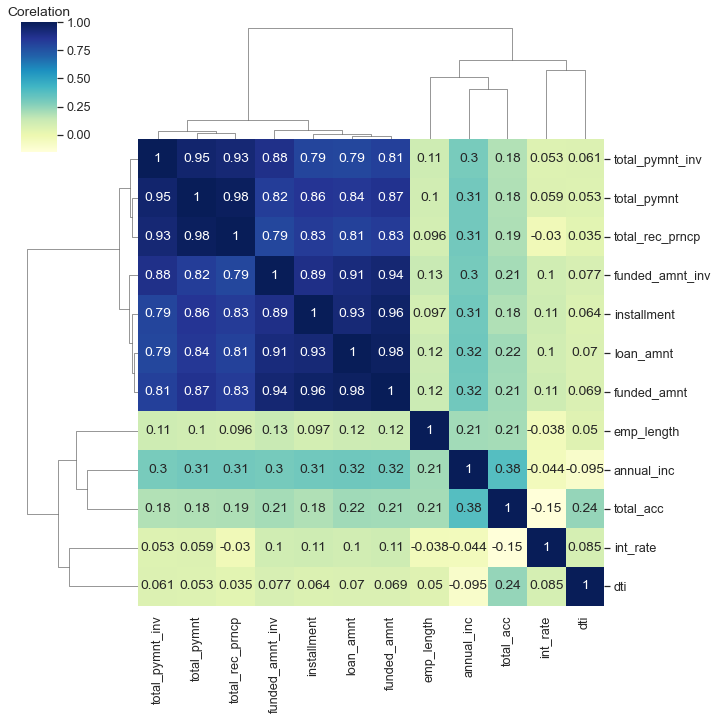

In [605]:
sns.set(font_scale=1.15)
plt.figure(figsize=(14,16))
sns.clustermap(corr,square=True,annot=True,cmap='YlGnBu')
plt.title('Corelation')

In [608]:
#Grouping the amount so that it can be easily comparable
loandataframe['loan_amt_gp']=pd.cut(loandataframe['loan_amnt'],[0,500,5500,10000,15000,25000,35000],labels=['0-500','500-5.5k','5.5K-10K','10k-15k','15k-25k','25k-35k'])


In [617]:
loandataframe['int_rate_gp']=pd.cut(loandataframe['int_rate'],[0,2,4,8,10,12,14,20,24],labels=['0-2%','2%-4%','4%-8%','8%-10%','10%-12%','12%-14%','14%-20%','20%-24%'])



In [687]:
loandataframe['annual_inc_gp']=pd.cut(loandataframe['annual_inc'],[4000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000],labels=['4k-10K','10k-20k','20K-30K','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k','100k-120k','120k-140k'])

In [757]:
#bins=[15,50,100,200,300,400,500,600,700,800]
loandataframe['installment_gp']=pd.cut(loandataframe['installment'],[15,50,100,200,300,400,500,600,700,800],labels=['15-50','50-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800'])

In [618]:
print(loandataframe['int_rate_gp'].value_counts())
print(loandataframe['annual_inc_gp'].value_counts())

4%-8%      7414
10%-12%    6959
14%-20%    6404
12%-14%    5883
8%-10%     3639
20%-24%     205
0-2%          0
2%-4%         0
Name: int_rate_gp, dtype: int64
4k-10K       0
10k-20k      0
20K-30K      0
30k-40k      0
40k-50k      0
50k-60k      0
60k-70k      0
70k-80k      0
80k-90k      0
90k-100k     0
100k-120k    0
120k-140k    0
Name: annual_inc_gp, dtype: int64


Based on the above graph
loanamount is +ve corelated with - funded_amt, fundend_amt_invest , installments , total_payment

## 1. LoanAmount 
#### LoanAmount Vs Interest rate

<AxesSubplot:xlabel='int_rate_gp', ylabel='loan_amt_gp'>

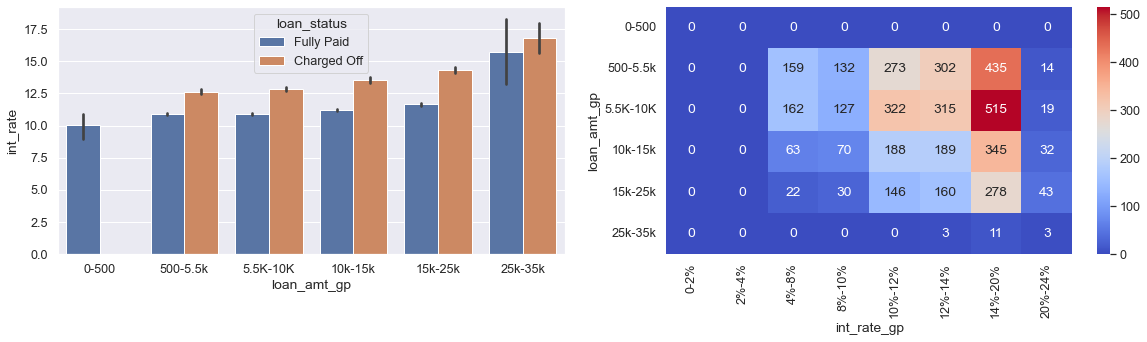

In [772]:
pivotTable=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='int_rate_gp', aggfunc=np.sum)
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(data=loandataframe[['loan_amt_gp','int_rate','loan_status']],x='loan_amt_gp',y='int_rate',hue='loan_status')
plt.subplot(222)
sns.heatmap(pivotTable, cmap='coolwarm', annot=True,fmt='d')



 #### LoanAmount vs (installment, grade,emp_length, home_ownership,issue_m,issue_y, Verification) on loan_status

<AxesSubplot:xlabel='grade', ylabel='loan_amt_gp'>

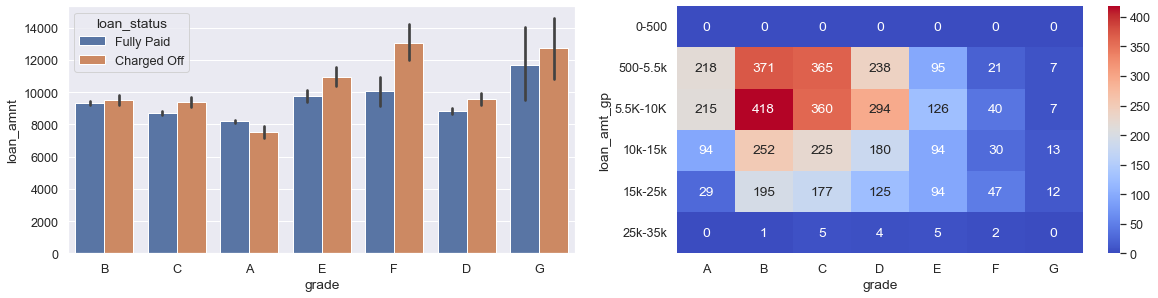

In [771]:
pt_grade=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='grade', aggfunc=np.sum)
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(data=loandataframe[['loan_amnt','grade','loan_status']],x='grade',y='loan_amnt',hue='loan_status')
#print(pt_grade)
plt.subplot(222)
sns.heatmap(pt_grade, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='installment_gp', ylabel='loan_amt_gp'>

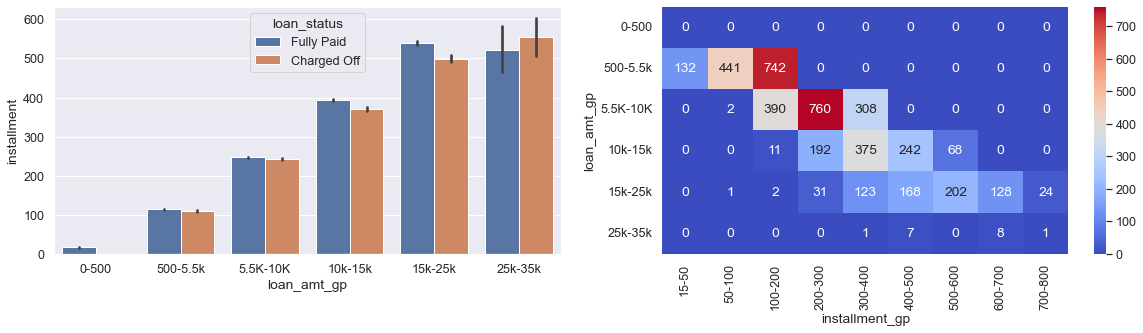

In [770]:
pt_installment=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='installment_gp', aggfunc=np.sum)
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(data=loandataframe[['loan_amt_gp','installment','loan_status']],x='loan_amt_gp',y='installment',hue='loan_status')
plt.subplot(222)
sns.heatmap(pt_installment, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='emp_length', ylabel='loan_amt_gp'>

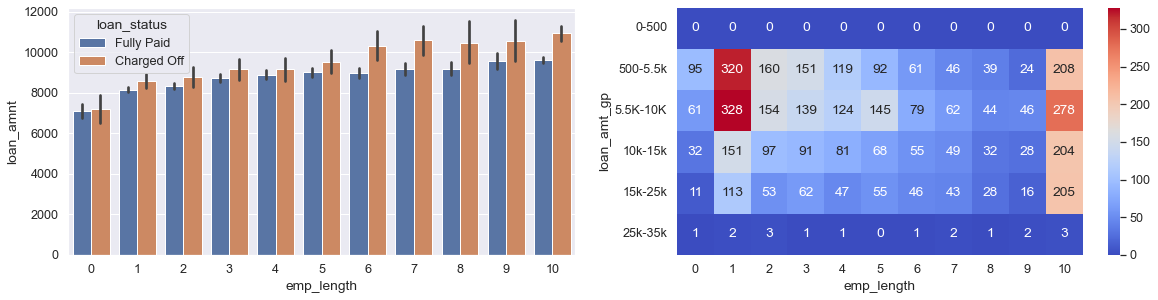

In [773]:
pt_empLength=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='emp_length', aggfunc=np.sum)
#print(pt_empLength)
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(data=loandataframe[['loan_amnt','emp_length','loan_status']],x='emp_length',y='loan_amnt',hue='loan_status')
plt.subplot(222)
sns.heatmap(pt_empLength, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amt_gp'>

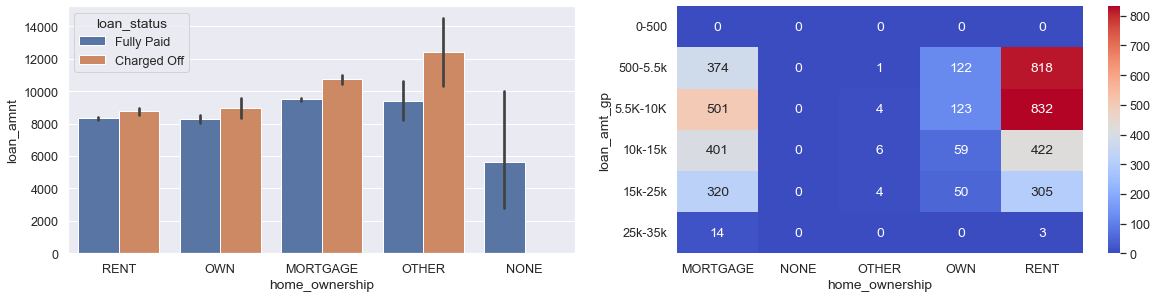

In [774]:
pt_ho=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='home_ownership', aggfunc=np.sum)
#print(pt_empLength)
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(data=loandataframe[['loan_amnt','home_ownership','loan_status']],x='home_ownership',y='loan_amnt',hue='loan_status')
plt.subplot(222)
sns.heatmap(pt_ho, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='purpose', ylabel='loan_amt_gp'>

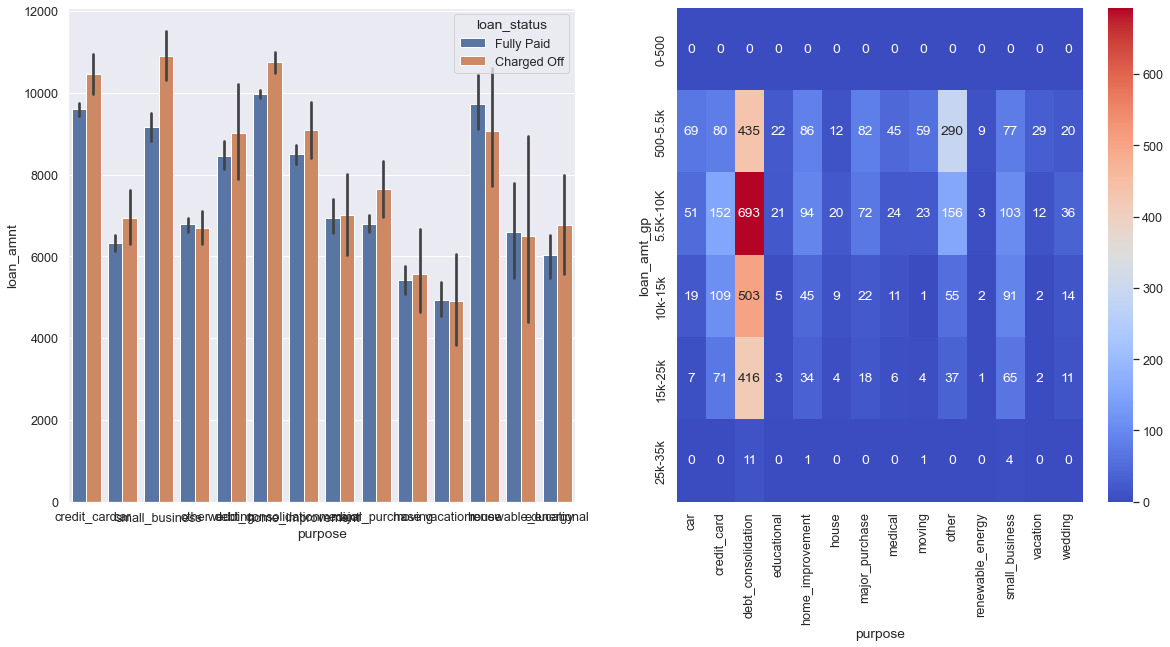

In [817]:
pt_purpose=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='purpose', aggfunc=np.sum)
#print(pt_empLength)
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data=loandataframe[['loan_amnt','purpose','loan_status']],x='purpose',y='loan_amnt',hue='loan_status')
plt.subplot(222)
sns.heatmap(pt_purpose, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='issue_y', ylabel='loan_amnt'>

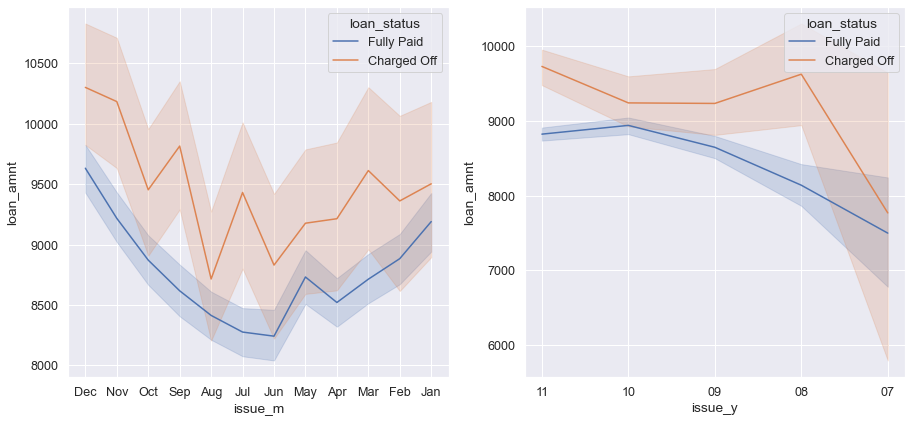

In [650]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.lineplot(data=loandataframe[['loan_amnt','issue_m','loan_status']],x='issue_m',y='loan_amnt',hue='loan_status')
plt.subplot(222)
sns.lineplot(data=loandataframe[['loan_amnt','issue_y','loan_status']],x='issue_y',y='loan_amnt',hue='loan_status')

#### LoanAmount vs (puprose, addr_state) on loan_status

<AxesSubplot:xlabel='addr_state', ylabel='loan_amt_gp'>

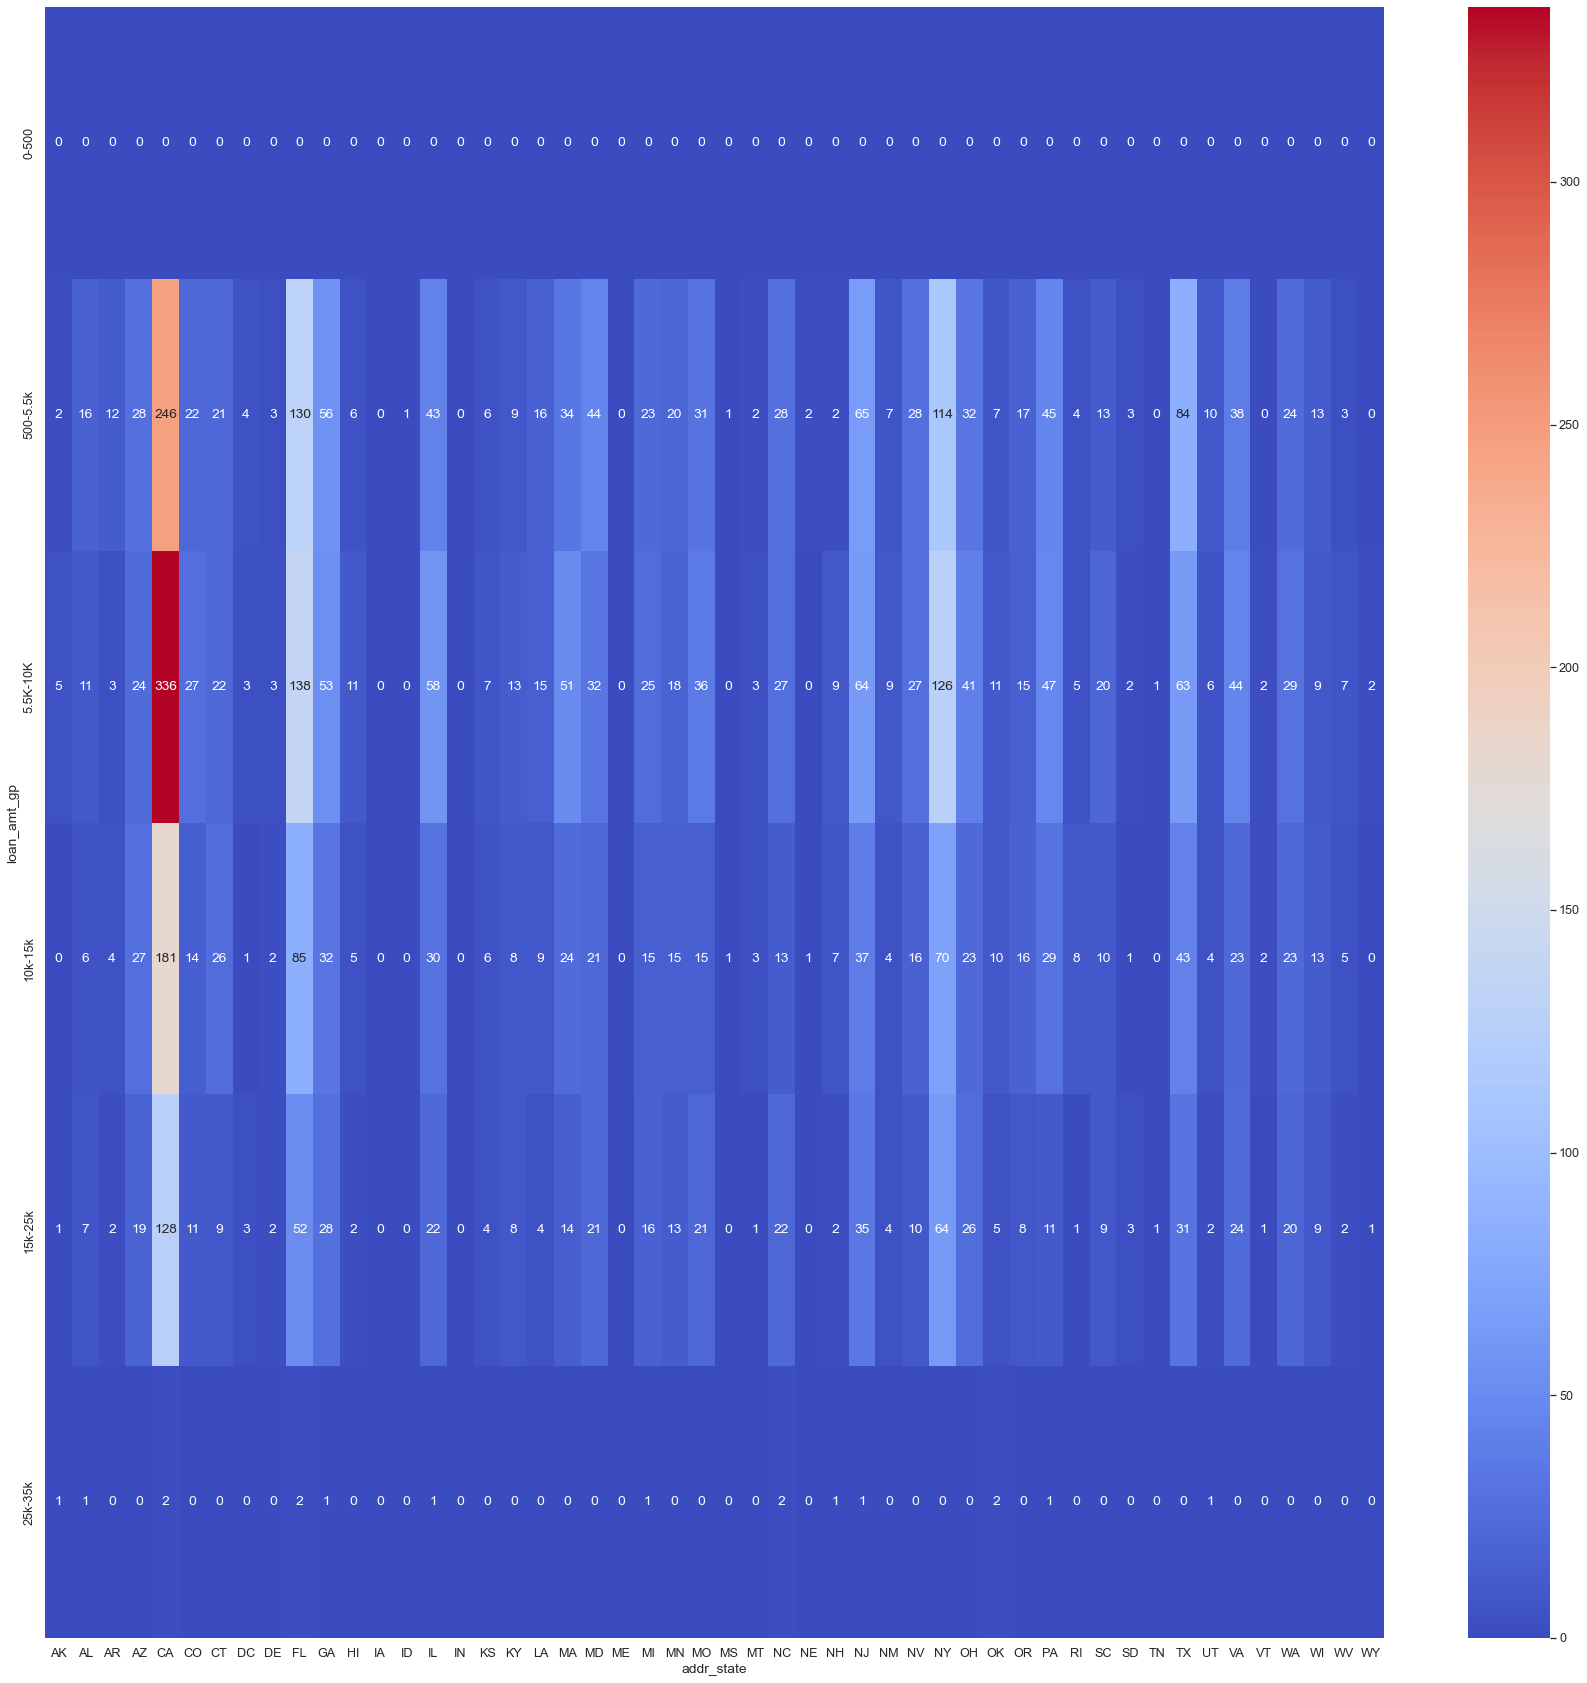

In [782]:
pt_addrs=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='addr_state', aggfunc=np.sum)
plt.figure(figsize=(30,30))
sns.heatmap(pt_addrs, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='addr_state', ylabel='loan_amnt'>

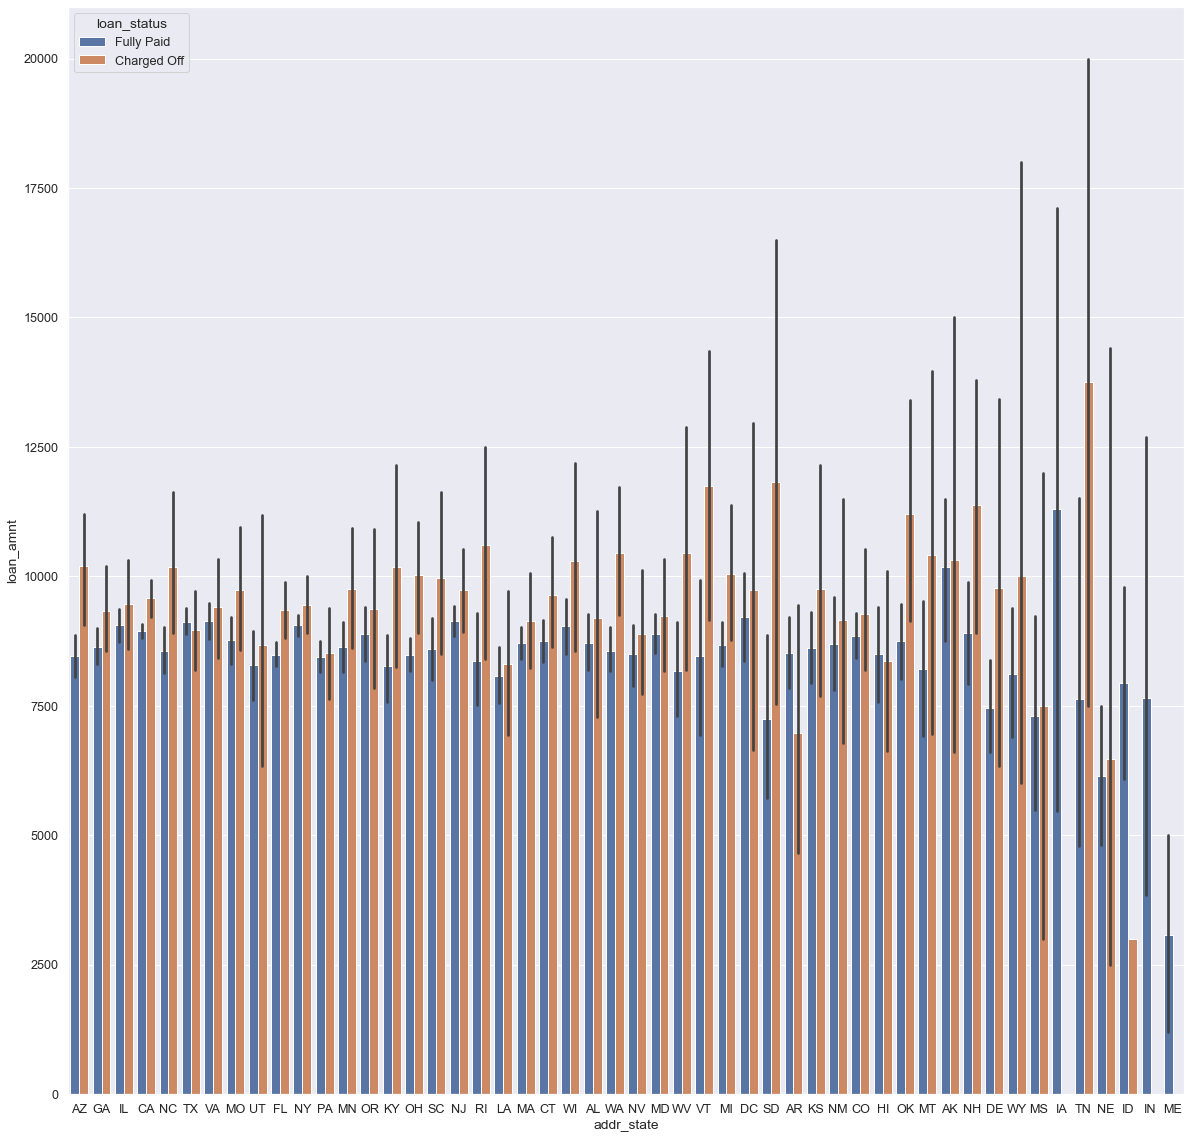

In [653]:
plt.figure(figsize=(20,20))
sns.barplot(data=loandataframe[['loan_amnt','addr_state','loan_status']],x='addr_state',y='loan_amnt',hue='loan_status')

Loan Amount
Maximum number of charged off
1. loan amount 5.5k and interest rate is in between 14-12%
2. loan amount 5.5k and grade is B
3. loan amount 5.5k-10K and installments are between 100-300
4. loan amount 5.5k-10K and emp-length 1 or 10 Years
5. loan amount 5.5k-10K and homeownership as Rent
6. loan amount 5.5k-10K and purpose is debt_consolidation
7. loan amount 5.5k-10K and state CA
8. Maxmimum loan amount charged off by smallbuisness
9. Maximum loan amout charged off by state NE

## 2. int_rate
#### int_rate vs installment

<AxesSubplot:xlabel='int_rate_gp', ylabel='installment'>

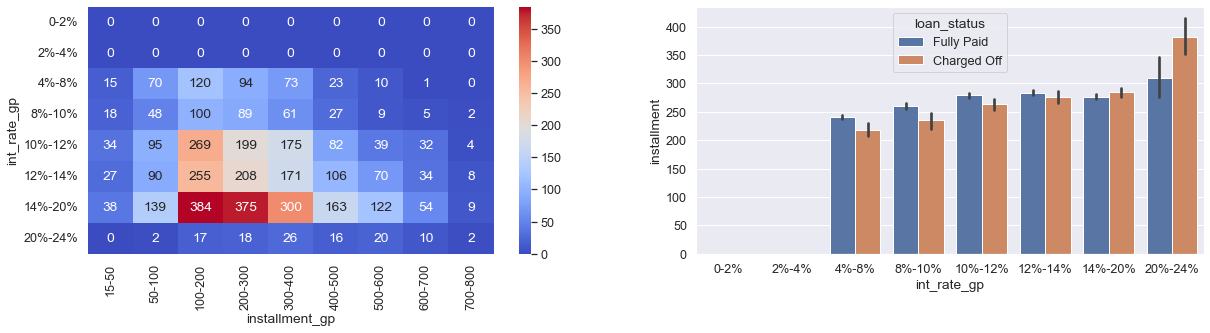

In [791]:
pt_rate_inst=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='installment_gp', aggfunc=np.sum)
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.heatmap(pt_rate_inst, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(222)
sns.barplot(data=loandataframe,x='int_rate_gp',y='installment',hue='loan_status')

#### int_rate vs (annual_inc,grade,emp_length, home_ownership,issue_m,issue_y, Verification) on loan_status

<AxesSubplot:xlabel='home_ownership', ylabel='int_rate_gp'>

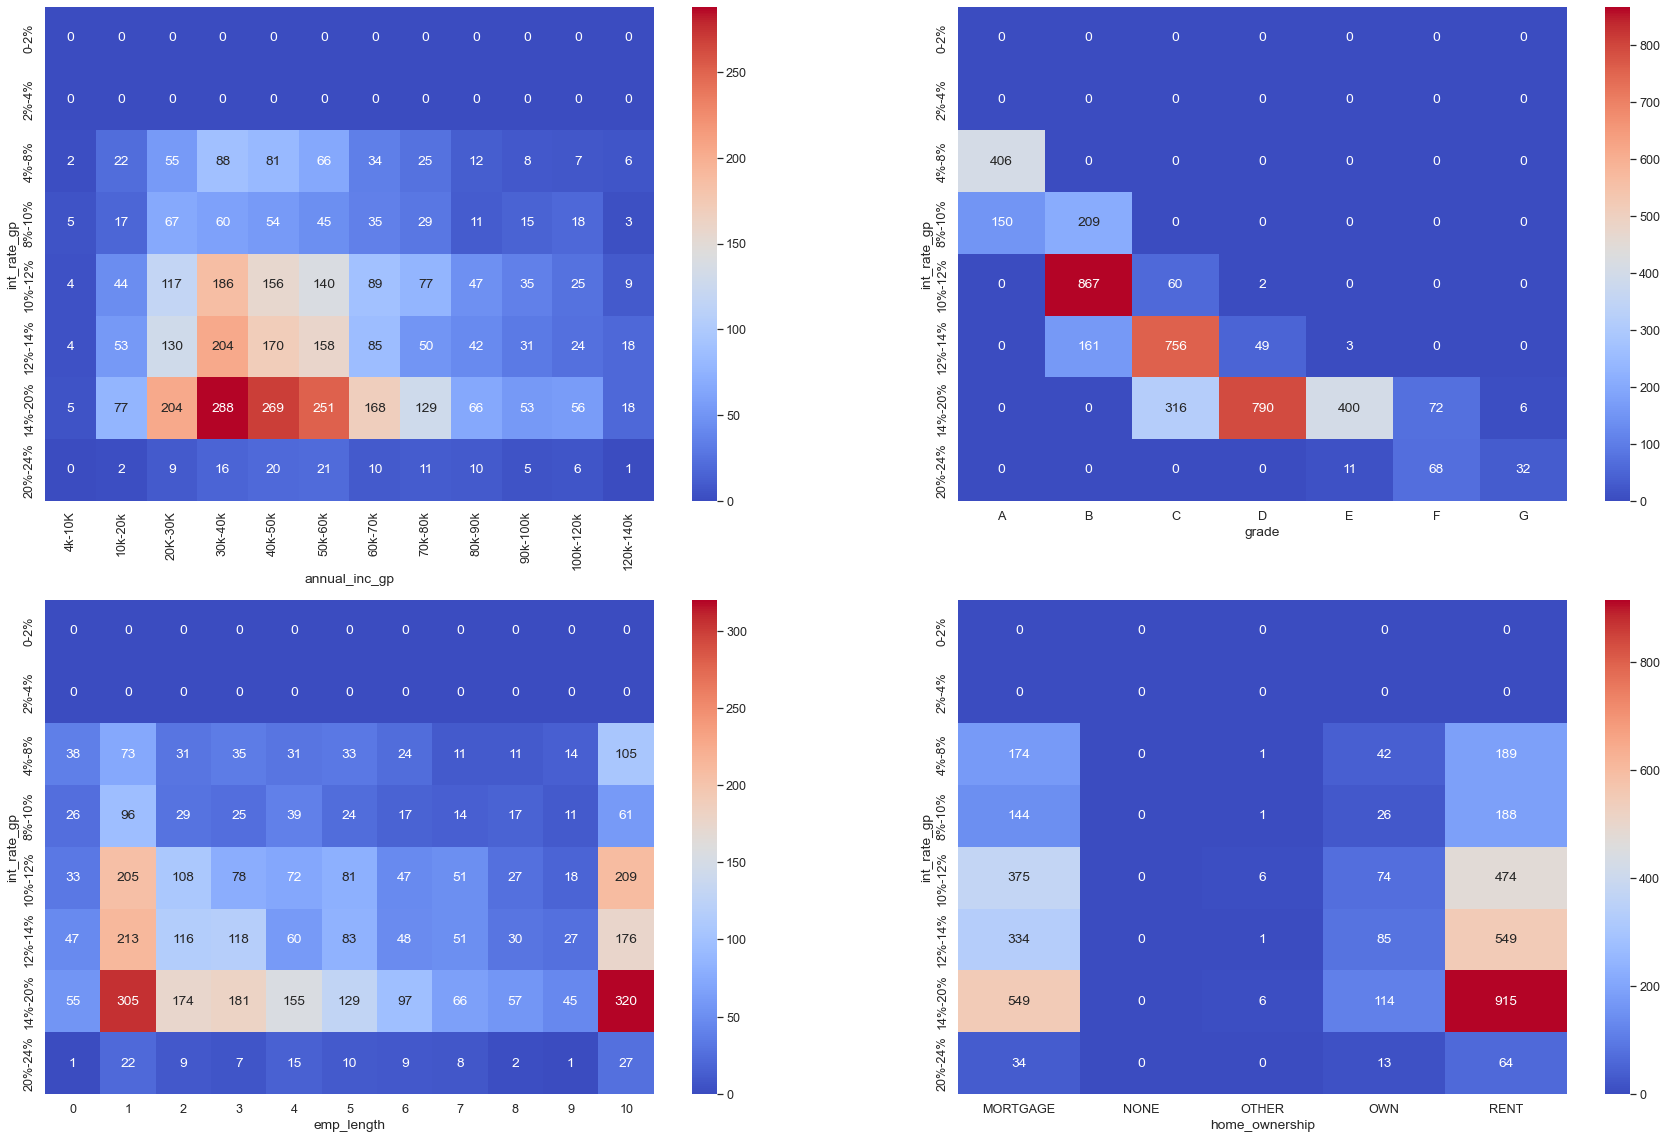

In [794]:
pt_rate_annuinc=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='annual_inc_gp', aggfunc=np.sum)
pt_rate_grade=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='grade', aggfunc=np.sum)
pt_rate_emplen=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='emp_length', aggfunc=np.sum)
pt_rate_ho=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='home_ownership', aggfunc=np.sum)
plt.figure(figsize=(30,20))
plt.subplot(221)
sns.heatmap(pt_rate_annuinc, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(222)
sns.heatmap(pt_rate_grade, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(223)
sns.heatmap(pt_rate_emplen, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(224)
sns.heatmap(pt_rate_ho, cmap='coolwarm', annot=True,fmt='d')

int_rate vs issue_m, issue_y

<AxesSubplot:xlabel='issue_y', ylabel='int_rate_gp'>

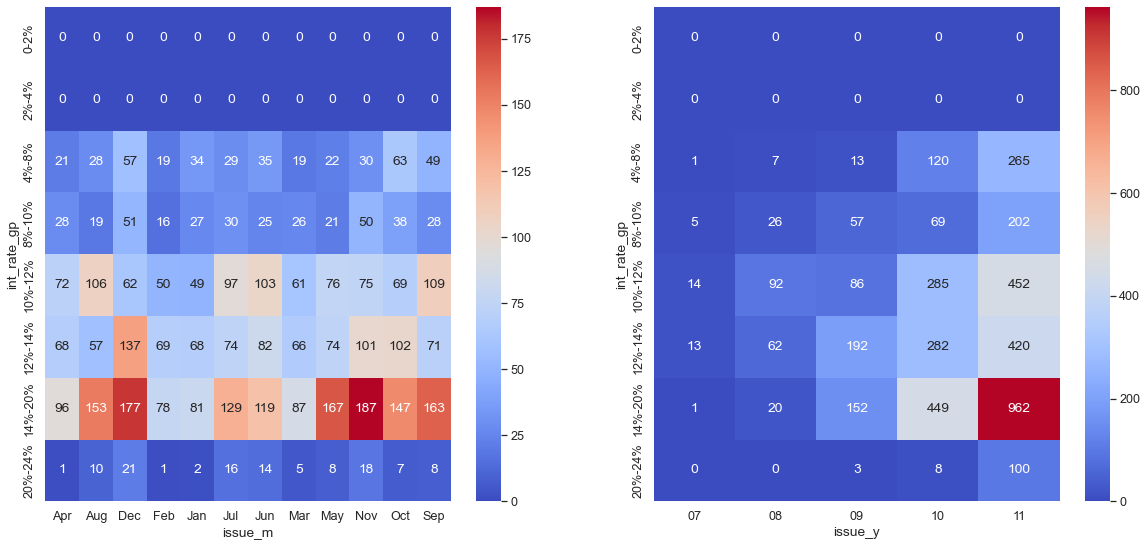

In [796]:
pt_rate_issum=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='issue_m', aggfunc=np.sum)
pt_rate_issuy=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='issue_y', aggfunc=np.sum)

plt.figure(figsize=(20,20))
plt.subplot(221)
sns.heatmap(pt_rate_issum, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(222)
sns.heatmap(pt_rate_issuy, cmap='coolwarm', annot=True,fmt='d')

Interest Rate
Maxmimum number of charge-off 
1. for 14-20% interest rate, if annualincome is in 30k-40k range.
2. for 12-20% interest rate, if grade is in B,C,D.
3. for 14-20% interest rate, if emp-length is eithier 1,10.
4. for 14-20% interest rate, if home_ownership is at Rent.
5. for 14-20% interest rate, if month is Nov,Dec
6. for 14-20% interest rate, if issue_y is 2011

## 3 . Annual Income
### annual_inc vs(grade,emp_length, home_ownership,issue_m,issue_y, Verification,purpose,addr_state)

<AxesSubplot:xlabel='issue_y', ylabel='annual_inc_gp'>

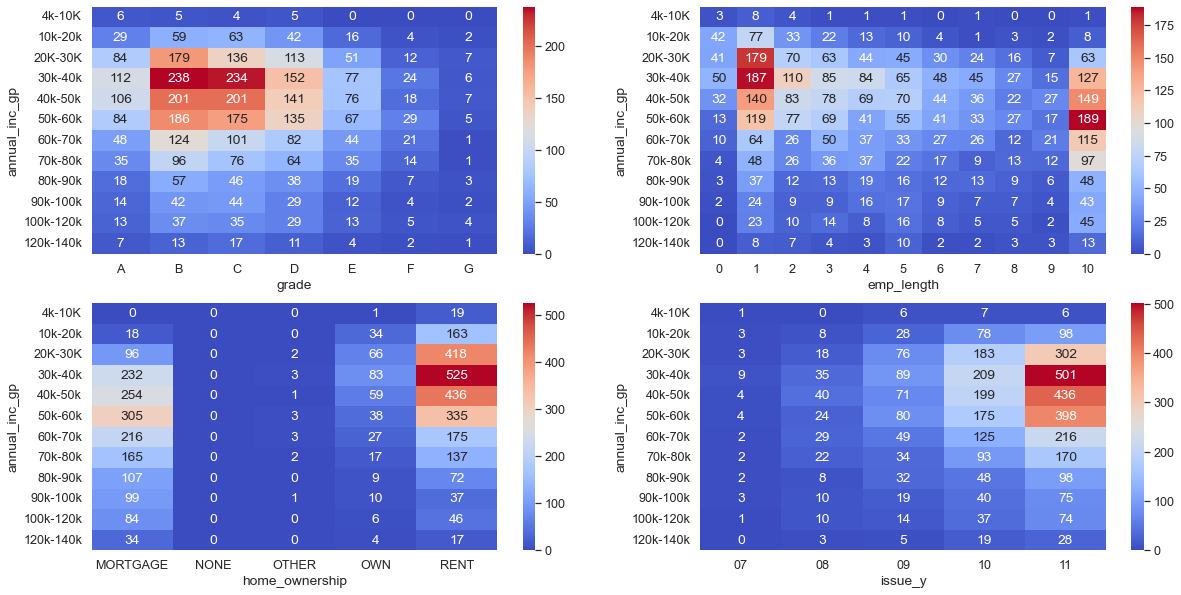

In [801]:
pt_anninc_grade=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='grade', aggfunc=np.sum)
pt_anninc_emplen=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='emp_length', aggfunc=np.sum)
pt_anninc_hmown=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='home_ownership', aggfunc=np.sum)
pt_anninc_issuy=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='issue_y', aggfunc=np.sum)

plt.figure(figsize=(20,10))
plt.subplot(221)
sns.heatmap(pt_anninc_grade, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(222)
sns.heatmap(pt_anninc_emplen, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(223)
sns.heatmap(pt_anninc_hmown, cmap='coolwarm', annot=True,fmt='d')
plt.subplot(224)
sns.heatmap(pt_anninc_issuy, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='verification_status', ylabel='int_rate_gp'>

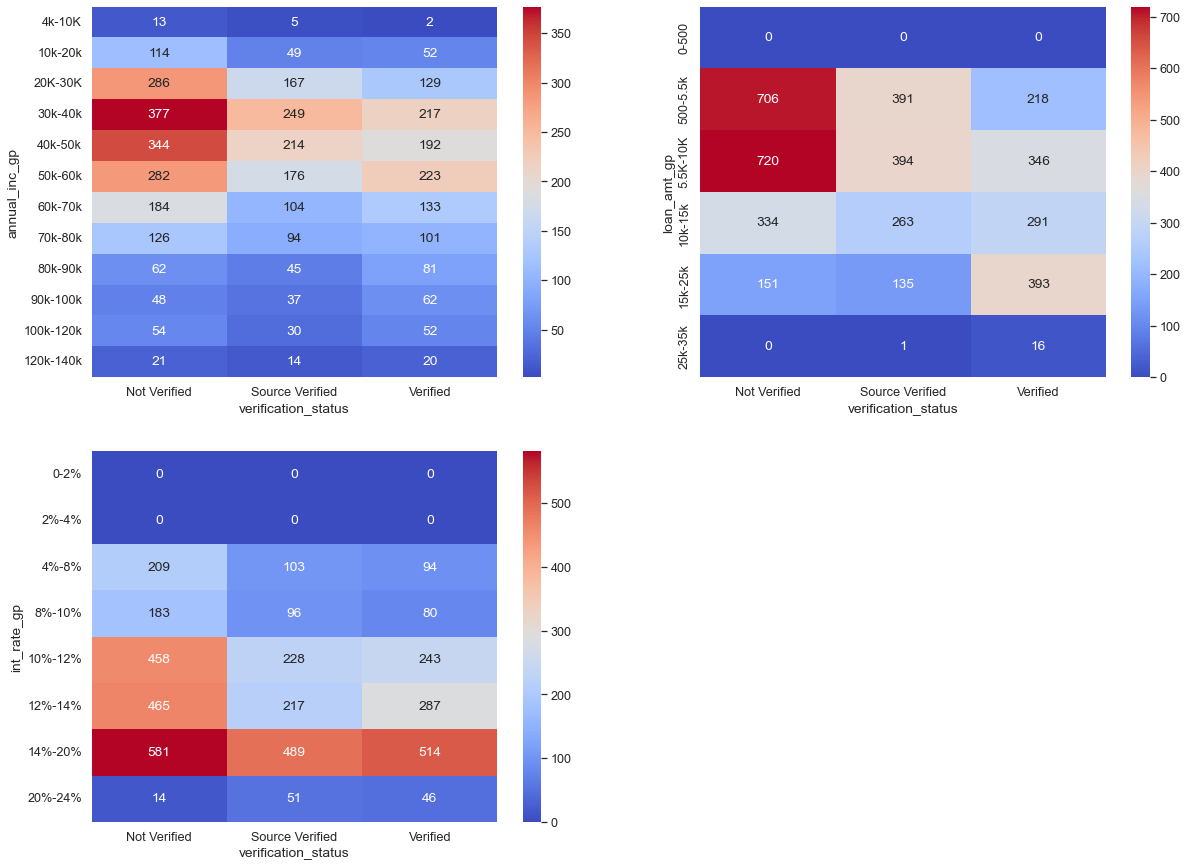

In [819]:
pt_anninc_vstatus=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='verification_status', aggfunc=np.sum)
pt_loanamt_vstatus=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='verification_status', aggfunc=np.sum)
pt_rate_vstatus=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='verification_status', aggfunc=np.sum)

plt.figure(figsize=(20,15))
plt.subplot(221)
sns.heatmap(pt_anninc_vstatus,cmap="coolwarm",annot=True,fmt='d')
plt.subplot(222)
sns.heatmap(pt_loanamt_vstatus,cmap="coolwarm",annot=True,fmt='d')
plt.subplot(223)
sns.heatmap(pt_rate_vstatus,cmap="coolwarm",annot=True,fmt='d')

<AxesSubplot:xlabel='purpose', ylabel='annual_inc_gp'>

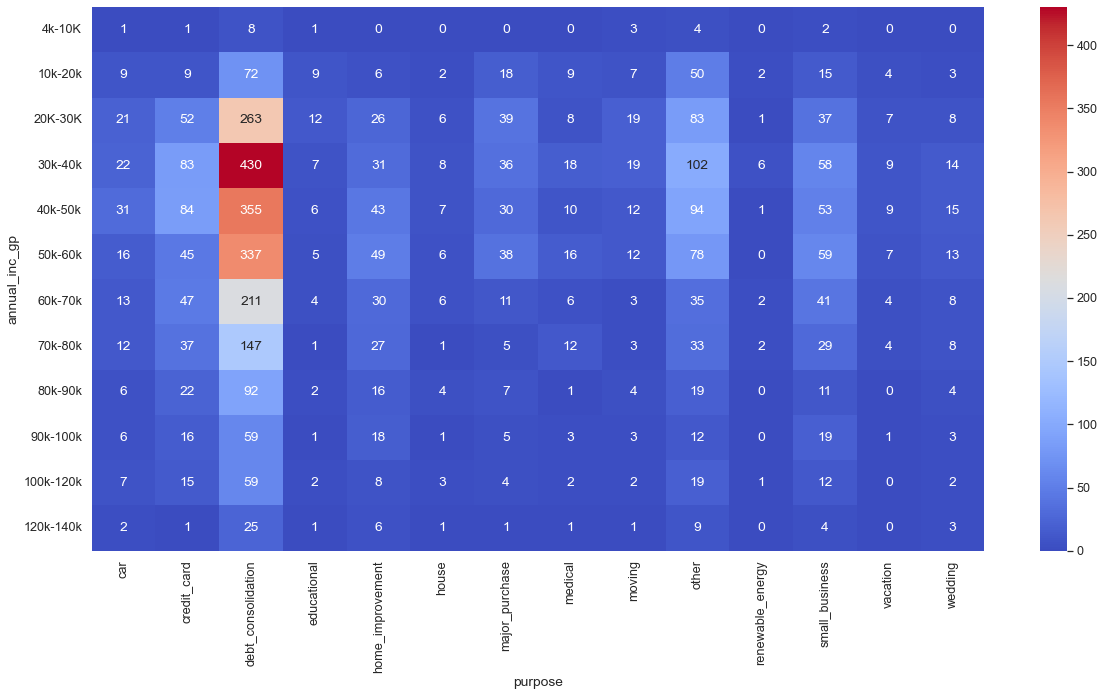

In [807]:
plt.figure(figsize=(20,10))
pt_anninc_purpose=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='purpose', aggfunc=np.sum)
sns.heatmap(pt_anninc_purpose,cmap='coolwarm',annot=True,fmt='d')

<AxesSubplot:xlabel='addr_state', ylabel='annual_inc'>

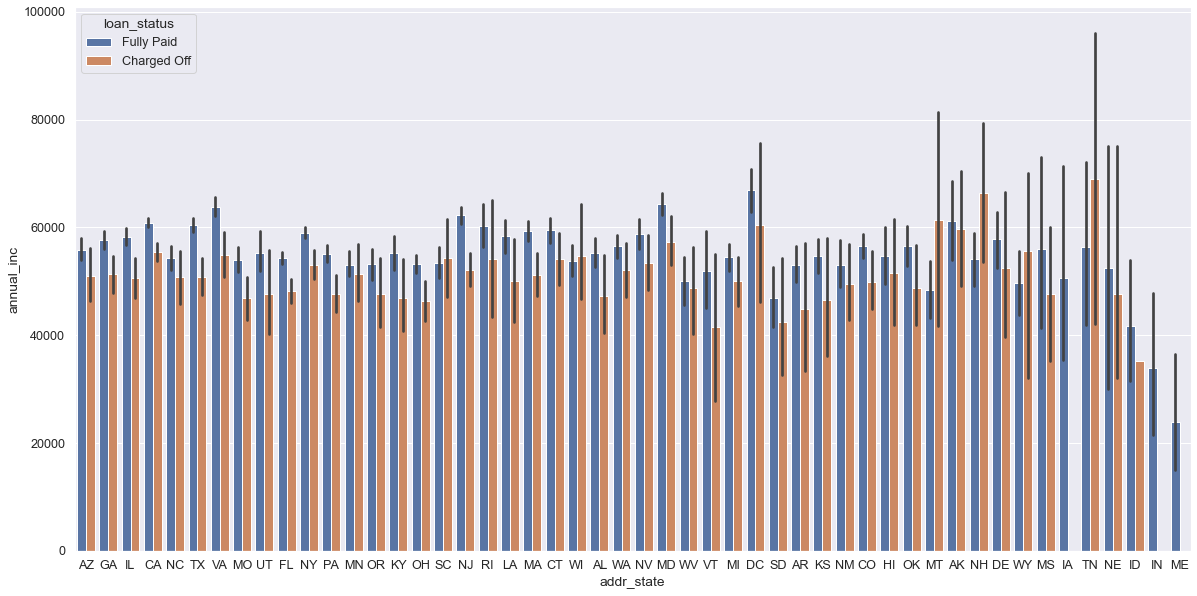

In [683]:
plt.figure(figsize=(20,10))
sns.barplot(data=loandataframe,x='addr_state',y='annual_inc',hue='loan_status')

<AxesSubplot:xlabel='annual_inc_gp', ylabel='installment'>

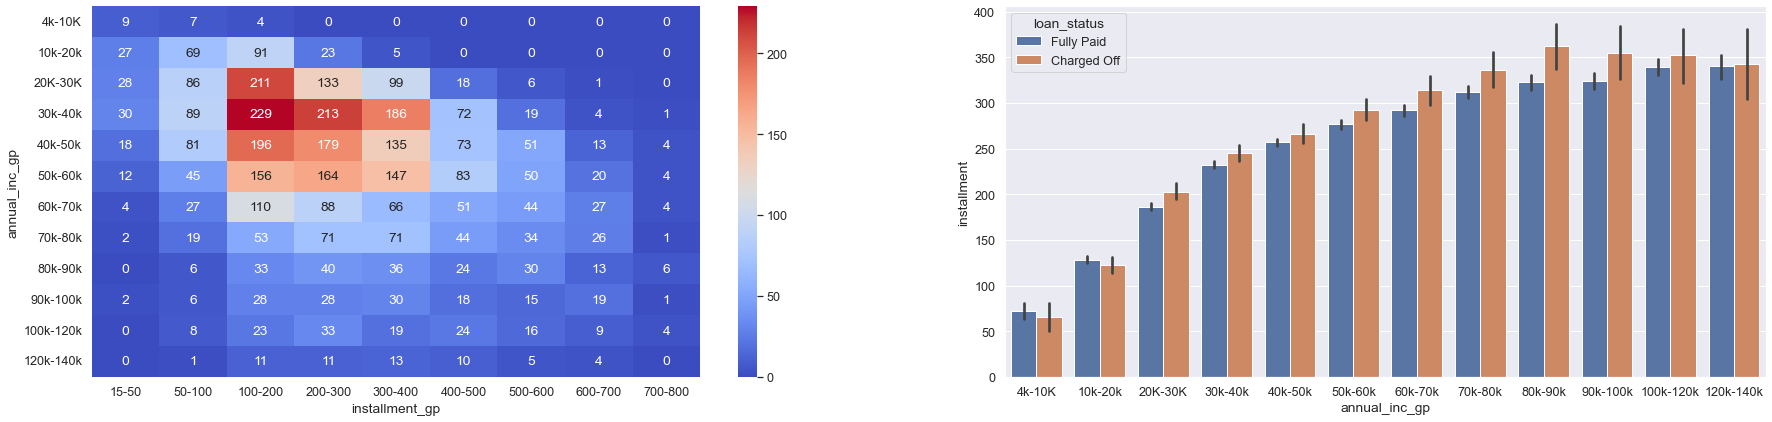

In [812]:
plt.figure(figsize=(30,15))
pt_anninc_inst=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='installment_gp', aggfunc=np.sum)
plt.subplot(221)
sns.heatmap(pt_anninc_inst,cmap='coolwarm',annot=True,fmt='d')
plt.subplot(222)
sns.barplot(data=loandataframe,x='annual_inc_gp',y='installment',hue='loan_status')

<AxesSubplot:xlabel='loan_amt_gp', ylabel='annual_inc_gp'>

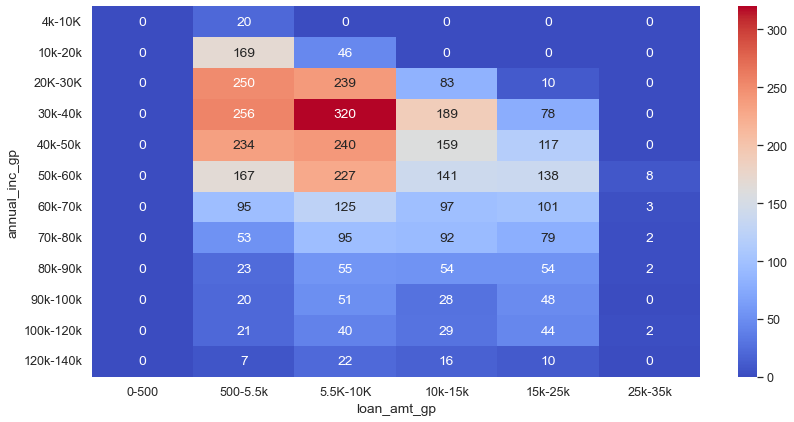

In [822]:
plt.figure(figsize=(30,15))
pt_anninc_loanamnt=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='loan_amt_gp', aggfunc=np.sum)
plt.subplot(221)
sns.heatmap(pt_anninc_loanamnt,cmap='coolwarm',annot=True,fmt='d')

<AxesSubplot:xlabel='open_acc', ylabel='int_rate_gp'>

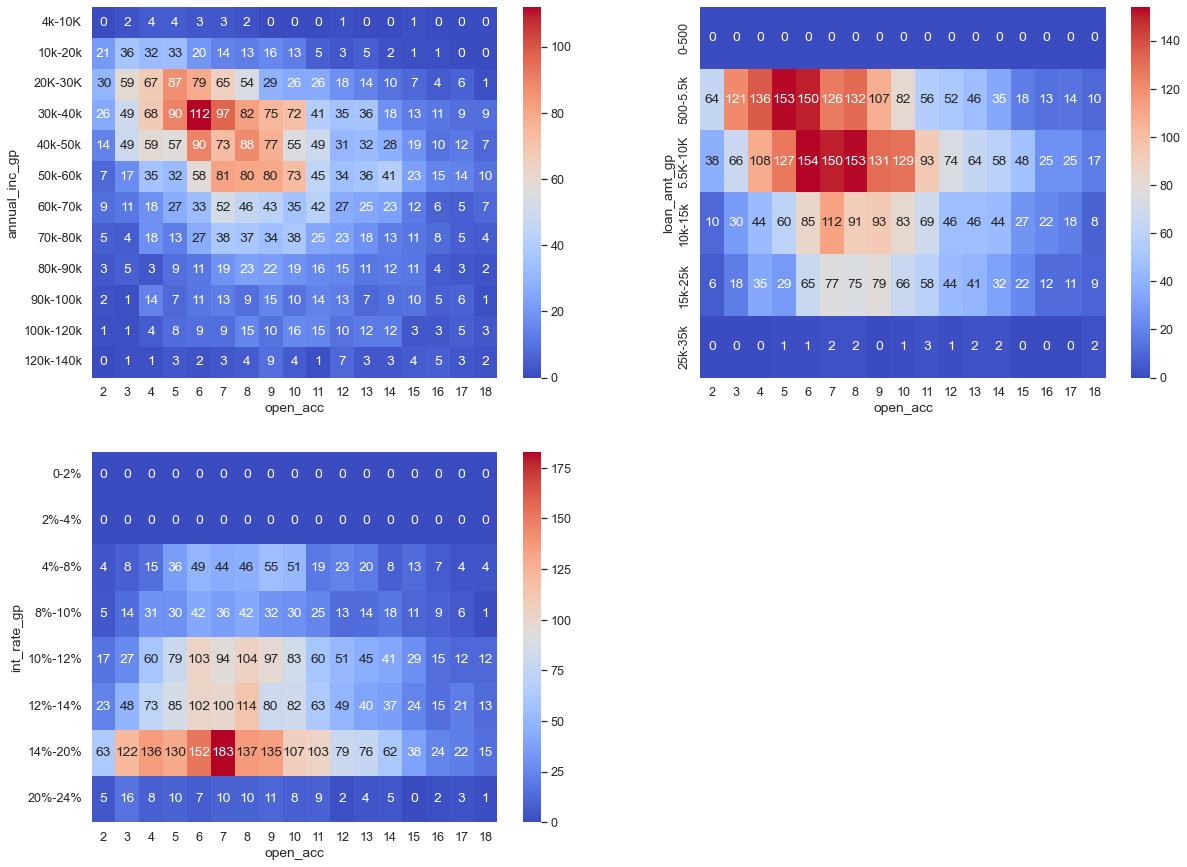

In [827]:
plt.figure(figsize=(20,15))
pt_anninc_openacc=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='open_acc', aggfunc=np.sum)
pt_loan_openacc=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='open_acc', aggfunc=np.sum)
pt_rate_openacc=pd.pivot_table(data=loandataframe,values='loan_status_int',index='int_rate_gp',columns='open_acc', aggfunc=np.sum)

plt.subplot(221)
sns.heatmap(pt_anninc_openacc,cmap='coolwarm',annot=True,fmt='d')
plt.subplot(222)
sns.heatmap(pt_loan_openacc,cmap='coolwarm',annot=True,fmt='d')
plt.subplot(223)
sns.heatmap(pt_rate_openacc,cmap='coolwarm',annot=True,fmt='d')

Annual Income
Maxmimum number of charge-off 
1. for 30k-40k and grade is B &C
2. for 30-40K, and emp-length 1 and for 50-60K, if emp-length is 10 years
3. for 30-40K, and house ownership is Rent
4. for 30-40k, and issue year is 2011
5. for 30-40k, and verification status is 'Not-Verified'
6  for 30-40k, and purpose is debt_consolidation
7. for 20k-40K, and installment is in 100-300
8  for 30-40k, and open_acc is 7 

### Overall observation from Bivariate Analysis
Possiblity of Loan charge off will be more 
* When Applicant have annual income in range of 30K-40K, 
* applied for Loan amount in between 5.5K -10K, 
* with heigher interest of 14-20%, 
* having a employment history of either 1 or 10, 
* and chose to repay installment in 100-300 installments, 
* with issue month as Nov Or dec
* as purpose of debt_considation
* as well applicant is not verified
* with 7-8 accounts
